In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime as dt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.dates as mdates
import xarray as xr
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from uncertainties import ufloat
import matplotlib
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
from datetime import datetime, timedelta


In [2]:
# load in data 
df = pd.read_excel('/Volumes/LaCie/LAVA-USB/KLERZ_results/All_Sites_PIV.xlsx',header=0,  parse_dates=['Date'])
#df.insert(1,'ratio_Mean2Max',(df.PIV_Mean/df.PIV_Max).values)


### Coverage

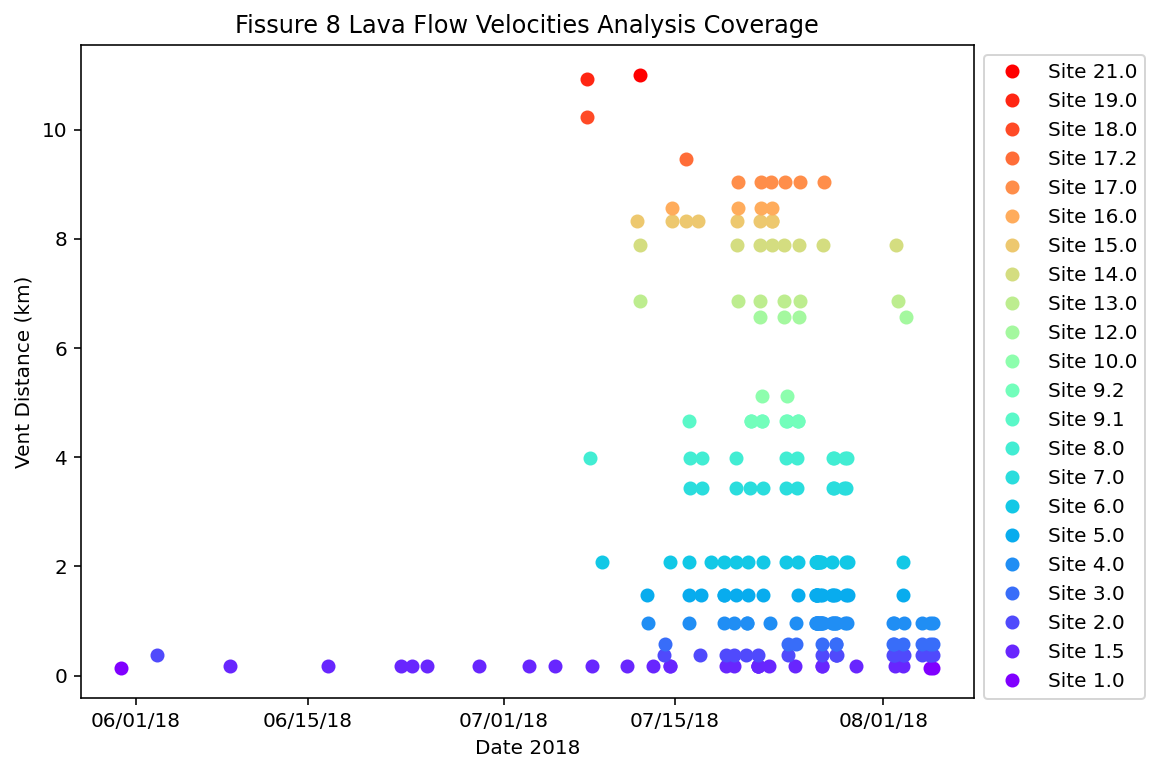

In [16]:

fig, ax = plt.subplots(figsize=(8, 6))
colors = cm.rainbow(np.linspace(0, 1, 22))
#Julydf = df.loc[df.Date> '7/7/18 19:45']

for i in range(df.Site.nunique()):
    #dfSite = Julydf[Julydf.Site == np.unique(Julydf.Site.values)[i]]
    dfSite = df[df.Site == np.unique(df.Site.values)[i]]
    X = dfSite['Date']
    Y = dfSite['Vent_Distance']/1000
    plt.title('Fissure 8 Lava Flow Velocities Analysis Coverage')
    plt.xlabel('Date 2018')
    plt.ylabel('Vent Distance (km)')
    myFmt = mdates.DateFormatter('%m/%d/%y')
    ax.xaxis.set_major_formatter(myFmt)
    plt.plot(X, Y, 'o', color = colors[i], label = 'Site ' + str(np.unique(df.Site.values)[i]))
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1,1), loc="upper left")
    #plt.yticks(range(1,22,1))
    #ax.axes.yaxis.set_ticklabels([])  
    plt.grid()


#ax2 = ax.twinx()   # mirror them
#ax2.set_yaxis(df['Site'])
#ax2.set_ylabel("Site")

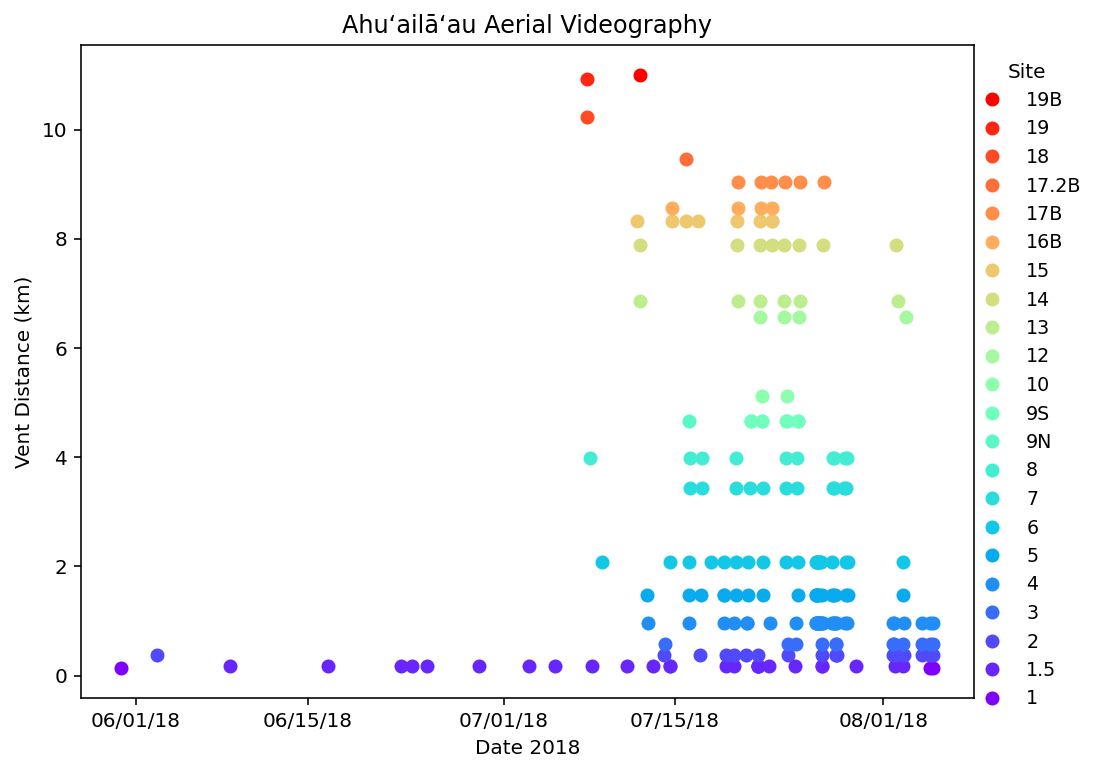

In [17]:

fig, ax = plt.subplots(figsize=(8, 6))
colors = cm.rainbow(np.linspace(0, 1, 22))
#Julydf = df.loc[df.Date> '7/7/18 19:45']

for i in range(df.Site.nunique()):
    #dfSite = Julydf[Julydf.Site == np.unique(Julydf.Site.values)[i]]
    dfSite = df[df.Site == np.unique(df.Site.values)[i]]
    X = dfSite['Date']
    Y = dfSite['Vent_Distance']/1000
    plt.title('Ahuʻailāʻau Aerial Videography')
    plt.xlabel('Date 2018')
    plt.ylabel('Vent Distance (km)')
    myFmt = mdates.DateFormatter('%m/%d/%y')
    ax.xaxis.set_major_formatter(myFmt)
    plt.plot(X, Y, 'o', color = colors[i], label = 'Site ' + str(np.unique(df.Site.values)[i]))
    plt.grid()
    handles, labels = ax.get_legend_handles_labels()
    labels = ['1', '1.5', '2', '3', '4', '5', '6', '7', '8', '9N', '9S', '10', '12', '13', '14', '15', '16B', '17B', '17.2B', '18', '19', '19B']
    plt.legend(handles[::-1], labels[::-1],bbox_to_anchor=(.98,1), frameon=False, loc="upper left", title="Site", fontsize='9.5')
    #plt.yticks(range(1,22,1))
    #ax.axes.yaxis.set_ticklabels([]) 



## Plot of All sites and dates velocities

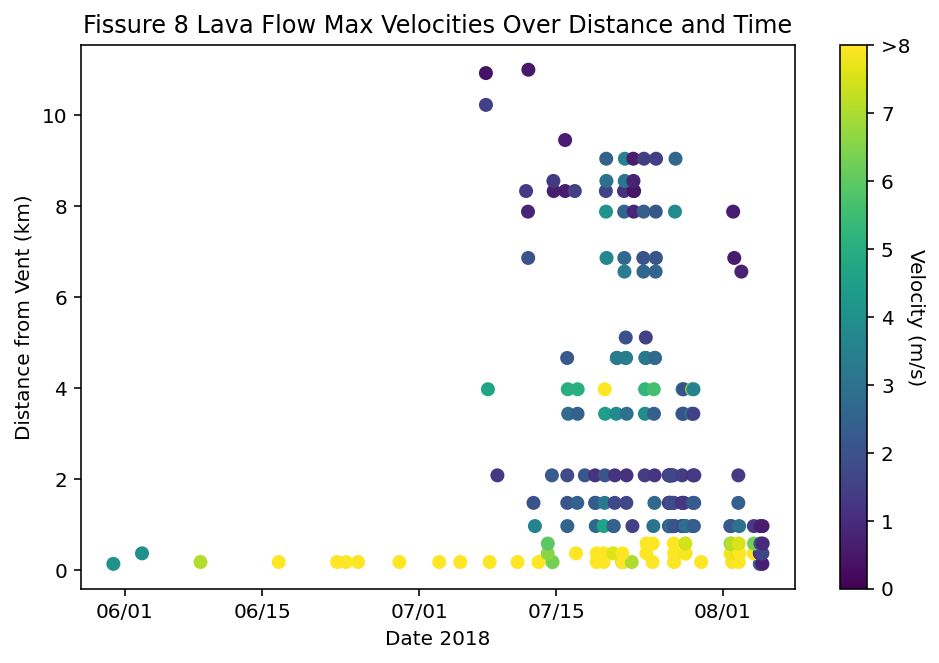

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))
dfSite = df[~df.PIV_Max.isnull()]
x = dfSite.Date
z = dfSite.PIV_Max
y = dfSite['Vent_Distance']/1000
plt.title('Fissure 8 Lava Flow Max Velocities Over Distance and Time')
plt.xlabel('Date 2018')
plt.ylabel('Distance from Vent (km)')
myFmt = mdates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(myFmt)
splot = ax.scatter(x, y, c=z, vmin = 0, vmax = 8 ) #, cmap=cm.nipy_spectral)
cbar = fig.colorbar(splot)
cbar.ax.set_yticklabels(['0','1','2','3', '4','5','6','7', '>8 '])
cbar.set_label('Velocity (m/s)' , rotation=270)


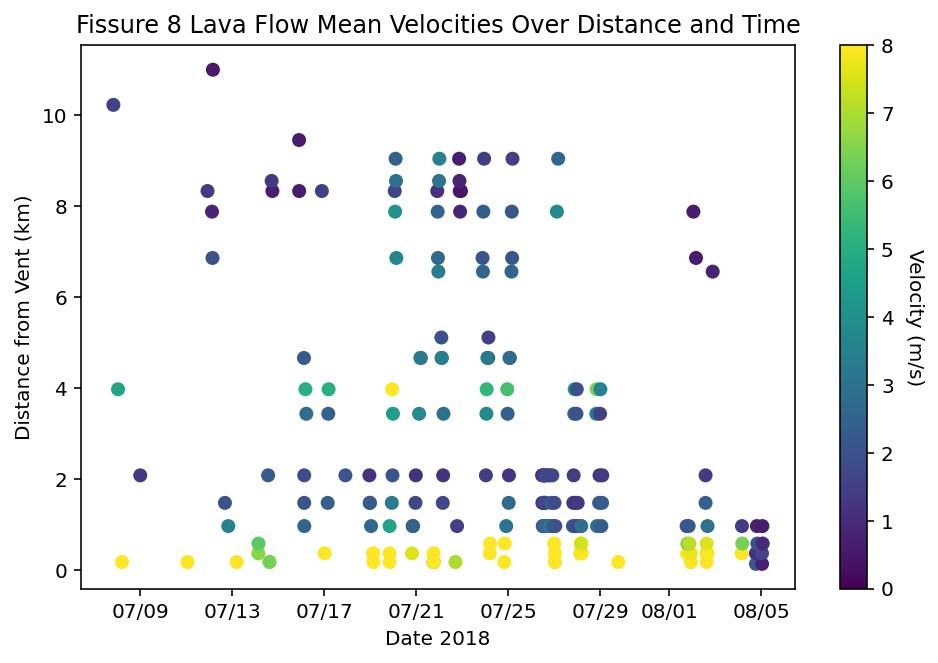

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))
dfSite = df[~df.PIV_Mean.isnull()]
Julydf = df.loc[df.Date> '7/7/18 19:45']
x = Julydf.Date
z = Julydf.PIV_Max
y = Julydf['Vent_Distance']/1000
plt.title('Fissure 8 Lava Flow Mean Velocities Over Distance and Time')
plt.xlabel('Date 2018')
plt.ylabel('Distance from Vent (km)')
myFmt = mdates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(myFmt)
splot = ax.scatter(x, y, c=z, vmin=0, vmax=8) #, vmin = 0, vmax = 3 ) #, cmap=cm.nipy_spectral)
cbar = fig.colorbar(splot)
#cbar.ax.set_yticklabels(['0', '0.5','1', '1.5   ', '2', '2.5','>3',])
cbar.set_label('Velocity (m/s)' , labelpad=15, rotation=270)

Site
1.0      2.313333
1.5     10.946608
2.0      7.461253
3.0      6.827372
4.0      2.376688
5.0      1.923376
6.0      1.529940
7.0      2.919947
8.0      5.009584
9.1      2.081240
9.2      3.182250
10.0     1.763067
12.0     2.336004
13.0     2.193902
14.0     2.160008
15.0     0.964283
16.0     2.049548
17.0     2.037591
17.2     0.632888
18.0     1.540754
19.0     0.347980
21.0     0.520360
Name: PIV_Max, dtype: float64

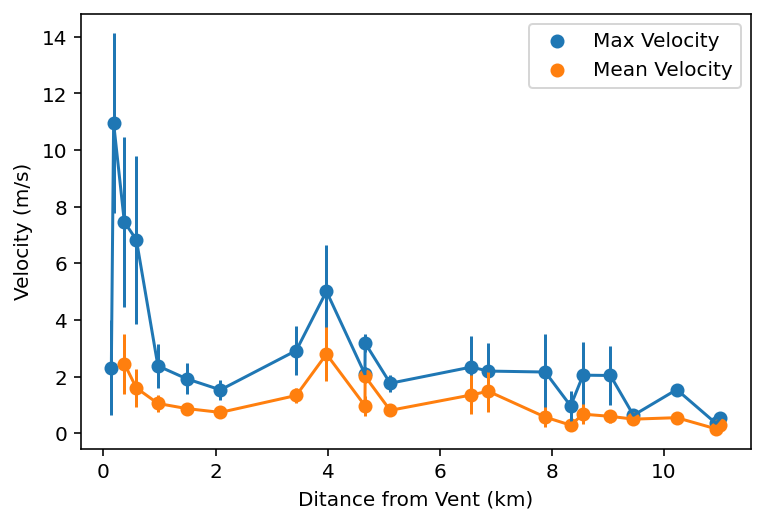

In [20]:
x1 = df.groupby('Site').mean().Vent_Distance[1:]/1000
y1 =df.groupby('Site').mean().PIV_Max[1:]
#err =df.groupby('Site').mean().Time_Stdv[2:]
err =df.groupby('Site').std().PIV_Max[1:]




plt.scatter(x1,y1, label = 'Max Velocity')
plt.errorbar(x1,y1,err)


x2 = df.groupby('Site').mean().Vent_Distance[2:]/1000
y2 =df.groupby('Site').mean().PIV_Mean[2:]
err2 =df.groupby('Site').std().PIV_Mean[2:]

plt.scatter(x2,y2, label = 'Mean Velocity')
plt.errorbar(x2,y2,err2)

plt.legend()
plt.ylabel('Velocity (m/s)')
plt.xlabel('Ditance from Vent (km)')

y1


Text(0.5, 0, 'Ditance from Vent (km)')

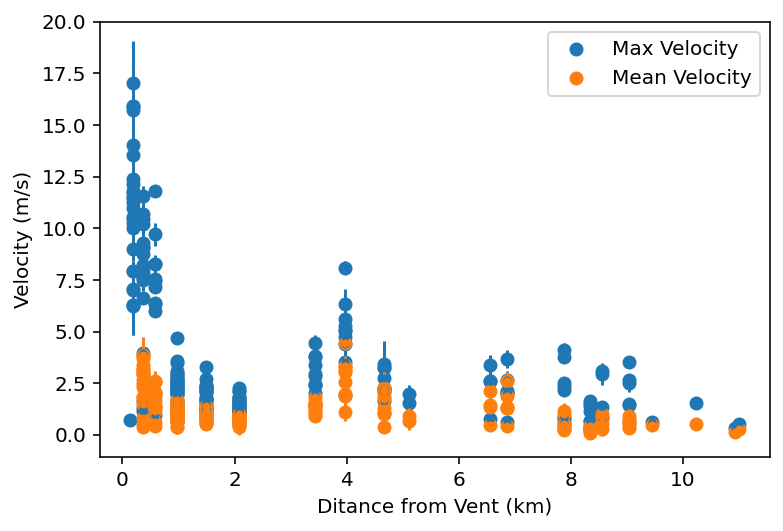

In [21]:
x1 = df.Vent_Distance[2:]/1000
y1 =df.PIV_Max[2:]
#err =df.groupby('Site').mean().Time_Stdv[2:]
err =df.Time_Stdv[2:]




plt.scatter(x1,y1, label = 'Max Velocity')
plt.errorbar(x1,y1,err, fmt='.')


x2 = df.Vent_Distance[2:]/1000
y2 =df.PIV_Mean[2:]

plt.scatter(x2,y2, label = 'Mean Velocity')
plt.errorbar(x2,y2,err,fmt='.')

plt.legend()
plt.ylabel('Velocity (m/s)')
plt.xlabel('Ditance from Vent (km)')

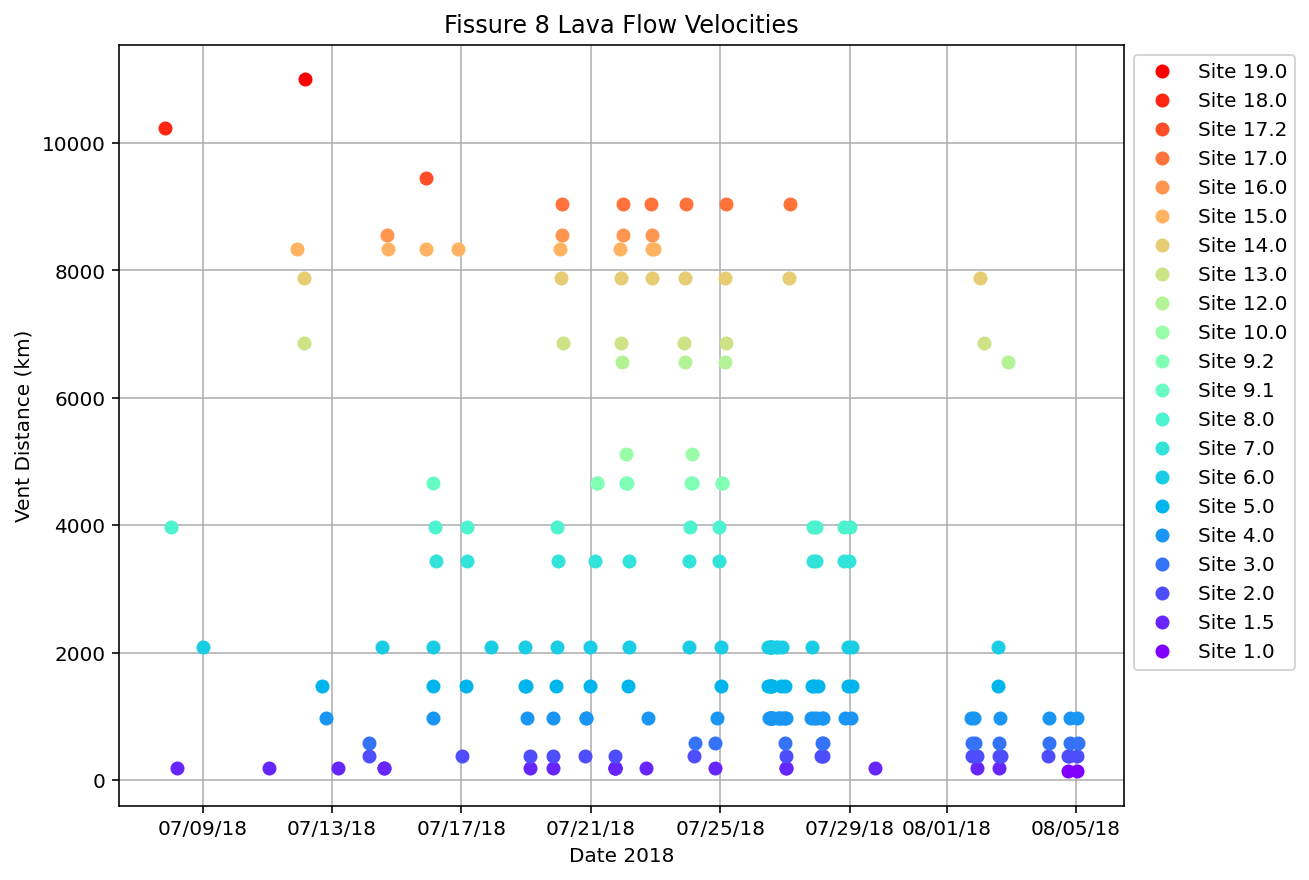

In [22]:

fig, ax = plt.subplots(figsize=(9, 7))
colors = cm.rainbow(np.linspace(0, 1, 21))
Julydf = df.loc[df.Date> '7/7/18 19:45']

for i in range(df.Site.nunique()-1):
    dfSite = Julydf[Julydf.Site == np.unique(Julydf.Site.values)[i]]
    #dfSite = df[~df.PIV_Max.isnull()]
    X = dfSite['Date']
    Y = dfSite['Vent_Distance']
    plt.title('Fissure 8 Lava Flow Velocities')
    plt.xlabel('Date 2018')
    plt.ylabel('Vent Distance (km)')
    myFmt = mdates.DateFormatter('%m/%d/%y')
    ax.xaxis.set_major_formatter(myFmt)
    plt.plot(X, Y, 'o', color=colors[i], label = 'Site ' + str(np.unique(df.Site.values)[i]))
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1,1), loc="upper left")
    #plt.yticks(range(1,22,1))
    #ax.axes.yaxis.set_ticklabels([])  
    plt.grid()



IndexError: index 21 is out of bounds for axis 0 with size 21

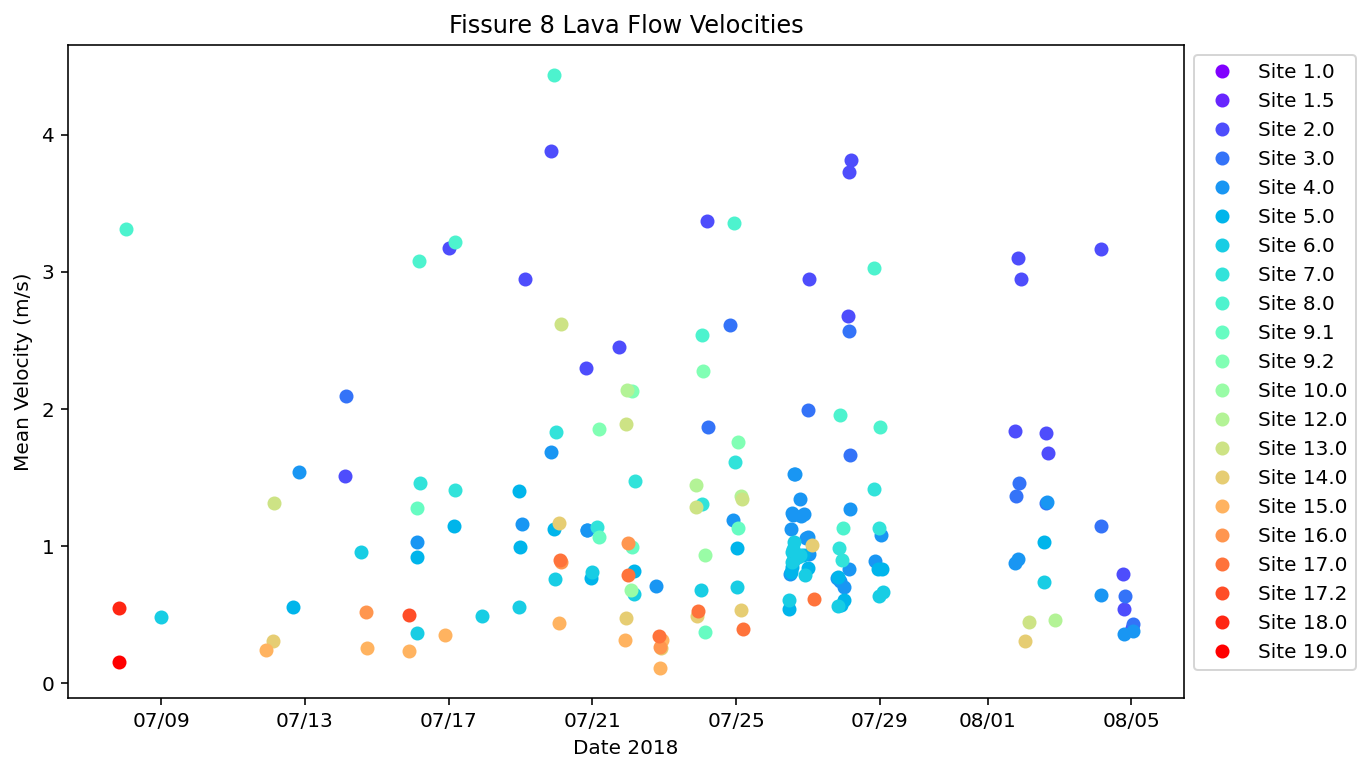

In [23]:

fig, ax = plt.subplots(figsize=(10, 6))
colors = cm.rainbow(np.linspace(0, 1, 21))
Julydf = df.loc[df.Date> '5/30/18 19:45']

for i in range(Julydf.Site.nunique()):
    dfSite = Julydf[Julydf.Site == np.unique(Julydf.Site.values)[i]]
    X = dfSite['Date']
    Y = dfSite['PIV_Mean']
    plt.title('Fissure 8 Lava Flow Velocities')
    plt.xlabel('Date 2018')
    plt.ylabel('Mean Velocity (m/s)')
    myFmt = mdates.DateFormatter('%m/%d')
    ax.xaxis.set_major_formatter(myFmt)
    plt.plot(X, Y, 'o', color = colors[i], label = 'Site ' + str(np.unique(Julydf.Site.values)[i]))
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")


        

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))
colors = cm.nipy_spectral(np.linspace(0, 1, 21))
Julydf = df.loc[df.Date> '7/7/18 19:45']

for i in range(Julydf.Site.nunique()):
    dfSite = Julydf[Julydf.Site == np.unique(Julydf.Site.values)[i]]
    X = dfSite['Date']
    Y = dfSite['PIV_Mean']
    Y2 = dfSite['PIV_Mean'].mean()
    plt.title('Fissure 8 Lava Flow Velocities')
    plt.xlabel('Date 2018')
    plt.ylabel('Mean Velocity (m/s)')
    myFmt = mdates.DateFormatter('%m/%d')
    ax.xaxis.set_major_formatter(myFmt)
    #ax.xaxis_date()
    plt.plot(X, Y, '.', color = colors[i], label = 'Site ' + str(np.unique(Julydf.Site.values)[i]))
    plt.axhline(y=Y2, color=colors[i], linestyle='--')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")


        

# Surge Analysis

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = cm.nipy_spectral(np.linspace(0, 1, 5))
Julydf = df.loc[df.Date >= '7/26/2018  11:54:00']
Julydf = Julydf.loc[Julydf.Date <= '7/27/18 1:024']

Julydf = Julydf.loc[ Julydf.Site < 7 ]
Julydf = Julydf.loc[ Julydf.Site > 3 ]



for i in range(Julydf.Site.nunique()):
    dfSite = Julydf[Julydf.Site == np.unique(Julydf.Site.values)[i]]
    X = dfSite['Date']
    Y = dfSite['PIV_Mean']
    plt.title('Site 4,5,6 Mean Velocity 7/26')
    plt.xlabel('Date 2018')
    plt.ylabel('Mean Velocity (m/s)')
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
    plt.plot(X, Y, 'o', color = colors[i], label = 'Site ' + str(np.unique(Julydf.Site.values)[i]))
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")



In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
colors = cm.nipy_spectral(np.linspace(0, 1, 5))
Julydf = df.loc[df.Date >= '7/26/2018  11:54:00']
Julydf = Julydf.loc[Julydf.Date <= '7/27/18 1:024']

Julydf = Julydf.loc[ Julydf.Site < 7 ]
Julydf = Julydf.loc[ Julydf.Site > 3 ]



for i in range(Julydf.Site.nunique()):
    dfSite = Julydf[Julydf.Site == np.unique(Julydf.Site.values)[i]]
    X = dfSite['Date']
    Y = dfSite['PIV_Mean']
    error = dfSite['Time_Stdv']
    #plt.errorbar(X, Y, yerr=error, fmt="o", color = colors[crange[i]], label = 'Site ' + str(np.unique(Julydf.Site.values)[i]))
    plt.title('Site 4,5,6 Max FLow Velocity 7/26')
    plt.xlabel('Date 2018')
    plt.ylabel('Max Velocity (m/s)')
    #myFmt = mdates.DateFormatter('%H:%M')
    #ax.xaxis.set_major_formatter(myFmt)
    #plt.plot(X, Y, 'o', color = colors[crange[i]], label = 'Site ' + str(np.unique(Julydf.Site.values)[i]))
    

    idx = pd.DatetimeIndex(dfSite['Date'])
    X2 = idx.day*24 + idx.hour + idx.minute / 60

    plt.errorbar(X2-624, Y, yerr=error, fmt="o", color = colors[i], label = 'Site ' + str(np.unique(Julydf.Site.values)[i]))
#plt.errorbar(X-625, Y, yerr=error, fmt="o" )
    a, b, c = np.polyfit(X2, Y,2)

    plt.plot((X2-624),a*(X2**2)+b*X2+c, '--', color = colors[i])
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
   


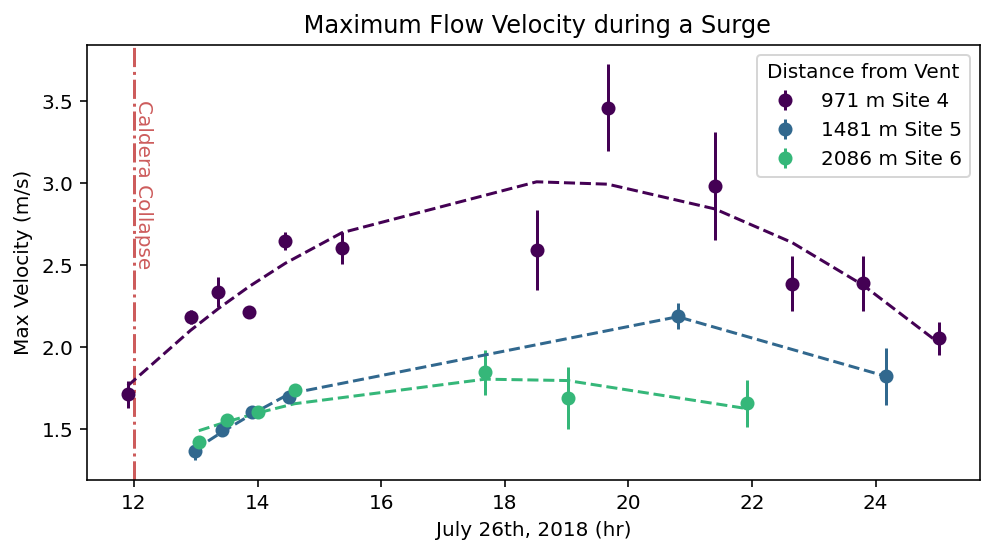

In [24]:
fig, ax = plt.subplots(figsize=(8, 4))
colors = cm.viridis(np.linspace(0, 1, 4))
Julydf = df.loc[df.Date >= '7/26/2018  11:54:00']
Julydf = Julydf.loc[Julydf.Date <= '7/27/18 1:024']

Julydf = Julydf.loc[ Julydf.Site < 7 ]
Julydf = Julydf.loc[ Julydf.Site > 3 ]

  
vline = 12 ### CHECK
plt.text(vline, 2.5, 'Caldera Collapse', rotation=-90, color = 'indianred')#trans)


plt.axvline( vline, ls='-.', color = 'indianred' )#, label = 'Caldera Collapse Event')  



for i in range(Julydf.Site.nunique()):
    dfSite = Julydf[Julydf.Site == np.unique(Julydf.Site.values)[i]]
    X = dfSite['Date']
    Y = dfSite['PIV_Max']
    error = dfSite['Time_Stdv']
    #plt.errorbar(X, Y, yerr=error, fmt="o", color = colors[crange[i]], label = 'Site ' + str(np.unique(Julydf.Site.values)[i]))
    plt.title(" Maximum Flow Velocity during a Surge")
    plt.xlabel('July 26th, 2018 (hr)')
    plt.ylabel('Max Velocity (m/s)')
    #myFmt = mdates.DateFormatter('%H:%M')
    #ax.xaxis.set_major_formatter(myFmt)
    #plt.plot(X, Y, 'o', color = colors[crange[i]], label = 'Site ' + str(np.unique(Julydf.Site.values)[i]))
    

    idx = pd.DatetimeIndex(dfSite['Date'])
    X2 = idx.day*24 + idx.hour + idx.minute / 60

    plt.errorbar(X2-624, Y, yerr=error, fmt="o", color = colors[i], label = str(np.unique(Julydf.Vent_Distance.values)[i]) + ' m Site ' + str(int(np.unique(Julydf.Site.values)[i])) )
#plt.errorbar(X-625, Y, yerr=error, fmt="o" )
    a, b, c = np.polyfit(X2, Y,2)
    
    
    #plt.text(vline, 2.1, 'Caldera Colapse Event', rotation=90, color = 'orangered')#trans)


    
    
    plt.plot((X2-624),a*(X2**2)+b*X2+c, '--', color = colors[i])
    plt.legend( loc="upper right", title="Distance from Vent")
#bbox_to_anchor=(.7,.7)  

0.3256846367007333
0.2161760670305873
0.190627288405569


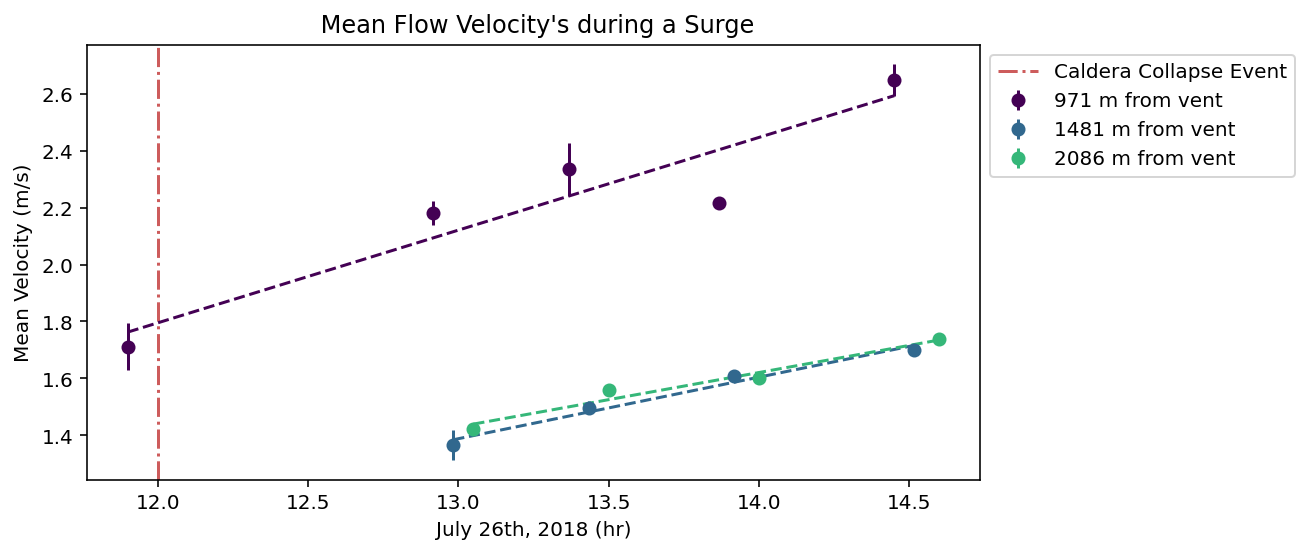

In [25]:
fig, ax = plt.subplots(figsize=(8, 4))
colors = cm.viridis(np.linspace(0, 1, 4))
Julydf = df.loc[df.Date >= '7/26/2018  11:54:00']
Julydf = Julydf.loc[Julydf.Date <= '7/26/2018 15:00:00']

Julydf = Julydf.loc[ Julydf.Site < 10 ]
Julydf = Julydf.loc[ Julydf.Site > 0 ]

vline = 12 ### CHECK
plt.axvline( vline, ls='-.', color = 'indianred', label = 'Caldera Collapse Event')  

for i in range(Julydf.Site.nunique()):
    dfSite = Julydf[Julydf.Site == np.unique(Julydf.Site.values)[i]]
    X = dfSite['Date']
    Y = dfSite['PIV_Max']
    error = dfSite['Time_Stdv']
    #plt.errorbar(X, Y, yerr=error, fmt="o", color = colors[crange[i]], label = 'Site ' + str(np.unique(Julydf.Site.values)[i]))
    plt.title(" Mean Flow Velocity's during a Surge")
    plt.xlabel('July 26th, 2018 (hr)')
    plt.ylabel('Mean Velocity (m/s)')
    #myFmt = mdates.DateFormatter('%H:%M')
    #ax.xaxis.set_major_formatter(myFmt)
    #plt.plot(X, Y, 'o', color = colors[crange[i]], label = 'Site ' + str(np.unique(Julydf.Site.values)[i]))
    

    idx = pd.DatetimeIndex(dfSite['Date'])
    X2 = idx.day*24 + idx.hour + idx.minute / 60

    plt.errorbar(X2-624, Y, yerr=error, fmt="o", color = colors[i], label =  str(np.unique(Julydf.Vent_Distance.values)[i]) + ' m from vent')
#plt.errorbar(X-625, Y, yerr=error, fmt="o" )
    b, c = np.polyfit(X2, Y,1)
    
    
    #plt.text(vline, 2.1, 'Caldera Colapse Event', rotation=90, color = 'orangered')#trans)


    
    
    plt.plot((X2-624),b*X2+c, '--', color = colors[i])
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    print(b)
    
    


In [26]:


# mean acceleration
#(0.06757290558103644 + 0.08584884185732149)/2

#max acceleration m/s / hour
(0.2161760670305873 + 0.190627288405569)/2

0.20340167771807816

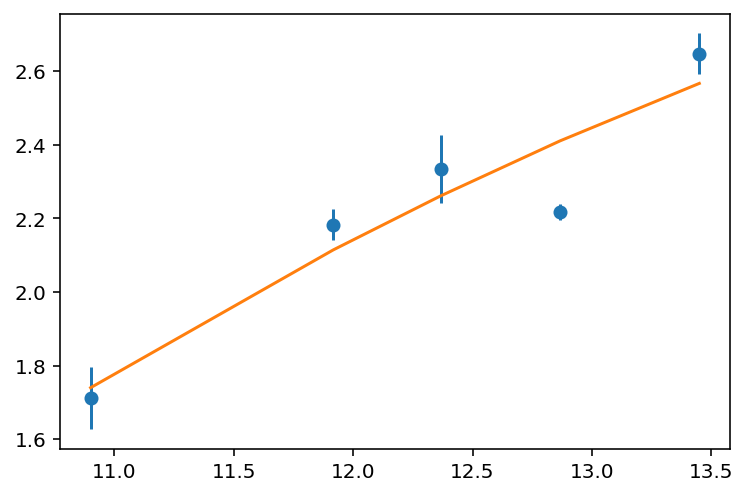

In [27]:
 dfSite6 = Julydf[Julydf.Site == np.unique(Julydf.Site.values)[0]]
idx = pd.DatetimeIndex(dfSite6['Date'])
dfSite6X = idx.day*24 + idx.hour + idx.minute / 60
Y = dfSite6['PIV_Max']
error = dfSite6['Time_Stdv']
plt.errorbar(dfSite6X-625, Y, yerr=error, fmt="o", label = 'Site 6' )
a, b, c = np.polyfit(dfSite6X, Y,2)

plt.plot((dfSite6X-625),a*(dfSite6X**2)+b*dfSite6X+c)


In [28]:
import scipy.stats as sp
dfSite6 = Julydf[Julydf.Site == np.unique(Julydf.Site.values)[0]]
idx = pd.DatetimeIndex(dfSite6['Date'])
dfSite6X = idx.day*24 + idx.hour + idx.minute / 60
y=np.array(dfSite6['PIV_Mean'].values, dtype=float)
x=np.array(dfSite6['Date'].index.values, dtype=float)
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

r =  0.9407080750603384 
 p =  0.017176177009174873 
 s =  0.03254150564654213


## Viscosity Figures

Jeffreys Equation:  <br />
$ \mu = \frac{ g *sin( \alpha) * d^2 * \rho)}{3V} $

#### Viscosity error


In [5]:
uPIV_Max =[]
for i in range(len(df.PIV_Max)):
    uPIV_Mean.append(ufloat(df.PIV_Max.values[i], df.Time_Stdv.values[i]))

uDensity =[]
for i in range(len(df.Density)):
    uDensity.append(ufloat(df.Density.values[i], df.Density_Error.values[i]))
    
uDepth =[]
for i in range(len(df.Depth_mean)):
    uDepth.append(ufloat(df.Depth_mean.values[i], df.Depth_std.values[i]))


vis_error = []
for i in range(len(df.PIV_Max)):
    vis_error.append((uDepth[i]**2 * uDensity[i] *9.81 *np.sin(df.Slope_Radians[i]))/(3*uPIV_Mean[i]))

type(vis_error[1])

#error values on viscosity
Vis_error = []
for i in range(len(df.PIV_Max)):
    Vis_error.append(vis_error[i].std_dev)

#df.insert(1,'Vis_error',Vis_error)

NameError: name 'uPIV_Mean' is not defined

### Viscosity error for elliptical channel

In [22]:
# mean channel depth is 6.5 m 
depth_MEAN = 6.54
depth_STDV = 1.975

In [20]:
df['Visc_ellip_AvgD'] = ((df.Density*9.81*np.sin(df.Slope_Radians))/df.PIV_Max)*((depth_MEAN **2) / (2*((depth_MEAN /(df.Mean_Width/2))+1)) + (.5)*((depth_MEAN /(df.Mean_Width/2))**2 +1))
df.Visc_ellip_AvgD

0       452.210552
1       830.423014
2      2609.900900
3       239.720028
4       139.390160
          ...     
206    1599.692747
207    7036.856692
208    6371.844282
209    3954.338127
210            NaN
Name: Visc_ellip_AvgD, Length: 211, dtype: float64

In [27]:
uPIV_Max =[]
for i in range(len(df.PIV_Max)):
    uPIV_Max.append(ufloat(df.PIV_Max.values[i], df.Time_Stdv.values[i]))

uDensity =[]
for i in range(len(df.Density)):
    uDensity.append(ufloat(df.Density.values[i], df.Density_Error.values[i]))
    
uDepth =[]
for i in range(len(df.Density)):
    uDepth.append(ufloat(depth_MEAN , depth_STDV))

uWidth =[]
for i in range(len(df.Mean_Width)):
    uWidth.append(ufloat(df.Mean_Width.values[i], df.Width_Error_Lowerbound.values[i]))


vis_error_e = []
for i in range(len(df.PIV_Max)):
    vis_error_e.append(((uDensity[i]*9.81*np.sin(df.Slope_Radians[i]))/uPIV_Max[i])*((uDepth[i]**2) / (2*((uDepth[i]/(uWidth[i]/2))**2+1)) + (.5)*((uDepth[i]/(uWidth[i]/2))**2 +1)))

#error values on viscosity
Visc_Error_Ellip_avgD = []
for i in range(len(df.PIV_Max)):
    Visc_Error_Ellip_avgD.append(vis_error_e[i].std_dev)

df.insert(1,'Visc_Ellip_avgD_error',Visc_Error_Ellip_avgD)

In [34]:
df.Visc_ellip_AvgD[160:]
df.Visc_Ellip_avgD_error[160:]

df.Visc_Ellip

0      110.57420
1      121.70120
2      172.22790
3       97.91188
4       82.01358
         ...    
206          NaN
207          NaN
208          NaN
209          NaN
210          NaN
Name: Visc_Ellip, Length: 211, dtype: float64

In [ ]:
df.Visc_ellip_AvgD[155:]
df.Site[155:]

#### All sites and dates

In [35]:
df['Visc_Ellip_error']
#df.to_excel('backup.xlsx')

0      55.642354
1      56.150214
2      85.527683
3      55.440207
4      47.214117
         ...    
206          NaN
207          NaN
208          NaN
209          NaN
210          NaN
Name: Visc_Ellip_error, Length: 211, dtype: float64

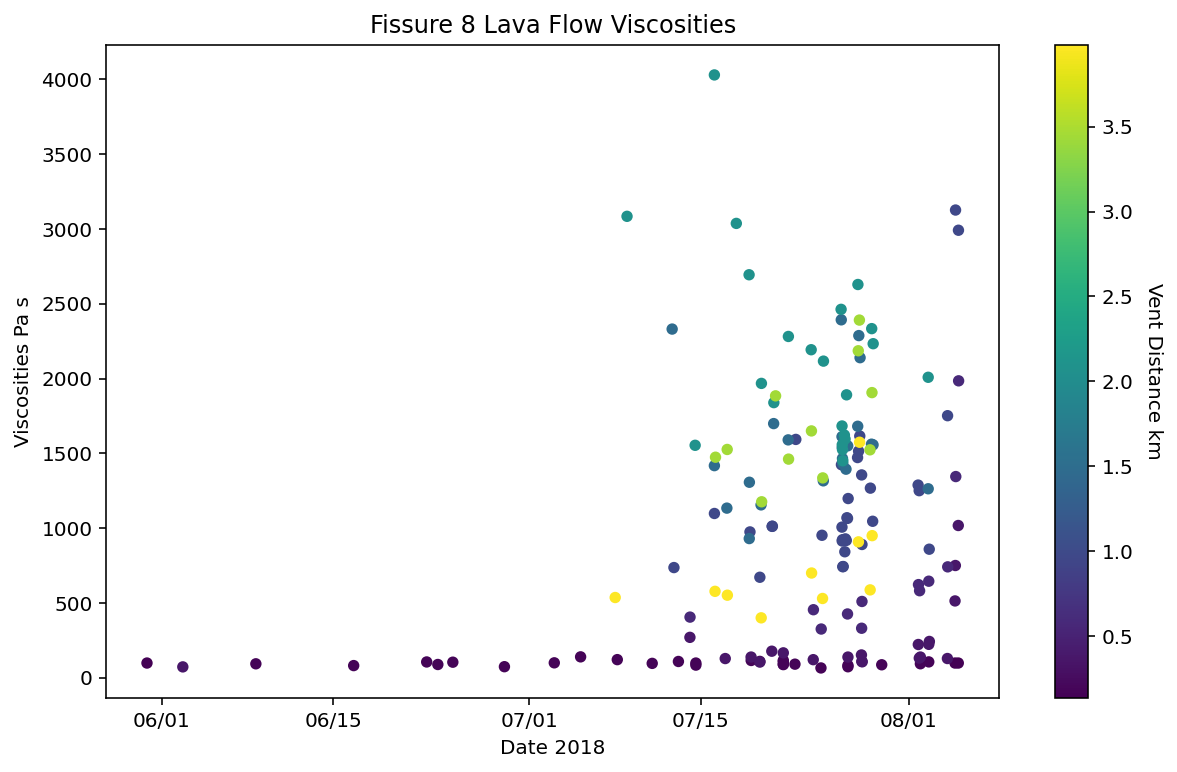

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(df['Date'], df['Visc_jeff'], s=22, c=df['Vent_Distance']/1000)
plt.title('Fissure 8 Lava Flow Viscosities')
plt.xlabel('Date 2018')
plt.ylabel('Viscosities Pa s')
myFmt = mdates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(myFmt)
cbar = plt.colorbar()
cbar.set_label('Vent Distance km', labelpad=15, rotation=270)



#### Viscosity as a function of distance from vent

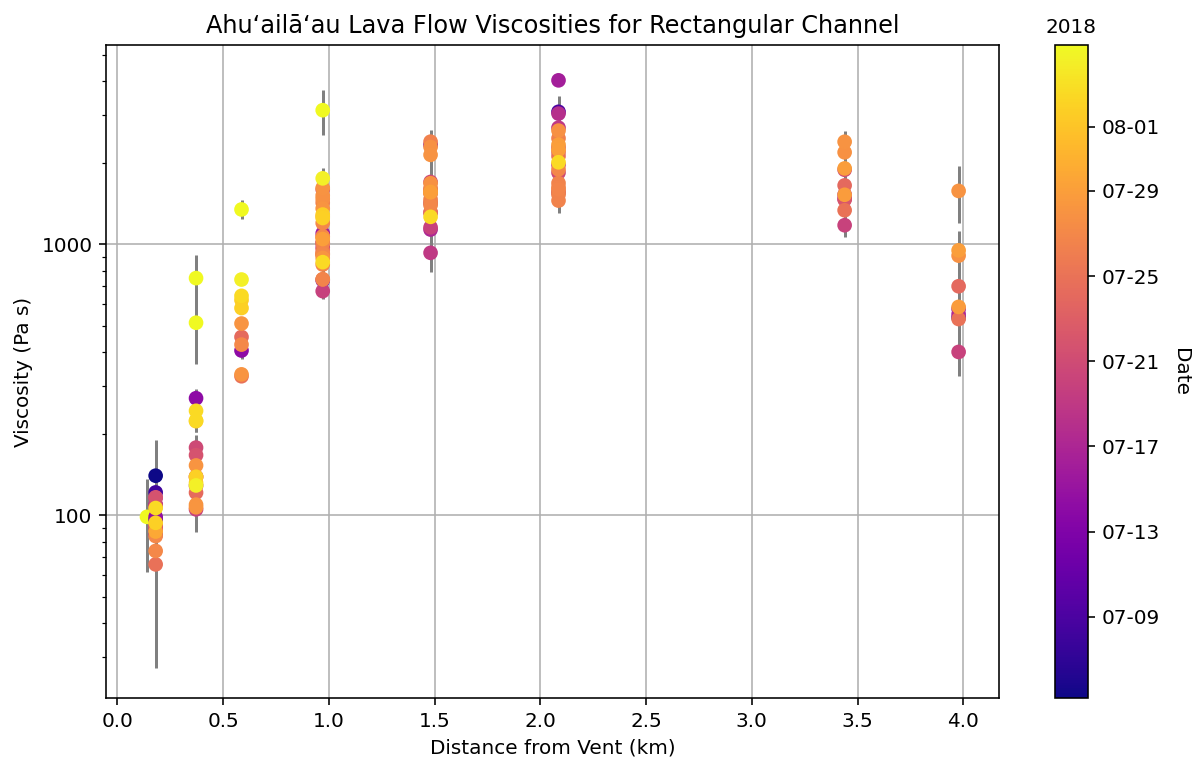

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
startTime = '7/05/18'
endTime = '8/05/18'
Julydf = df.loc[df.Date>= startTime ]
Julydf = Julydf.loc[Julydf.Date <= endTime]

z=mdates.date2num(Julydf.Date)

plt.errorbar(Julydf['Vent_Distance']/1000, Julydf['Visc_jeff'],Julydf['Visc_Error'], fmt ='.', color='gray')

plt.scatter(Julydf['Vent_Distance']/1000, Julydf['Visc_jeff'], s=40 , c=z, cmap = 'plasma', zorder=10)
#plt.errorbar(df['Vent_Distance']/1000, df['Visc_jeff'], df['Vis_error'], fmt='o') #), c=df['Vent_Distance']/1000)
cb = plt.colorbar()
loc = mdates.AutoDateLocator()
cb.ax.yaxis.set_major_locator(loc)
cb.ax.yaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
cb.set_label('Date', labelpad=15, rotation=270)
cb.ax.set_title('2018', fontsize=10)

plt.title('Ahuʻailāʻau Lava Flow Viscosities for Rectangular Channel')
plt.xlabel('Distance from Vent (km)')
plt.ylabel('Viscosity (Pa s)')


#myFmt = mdates.DateFormatter('%m/%d')
#ax.xaxis.set_major_formatter(myFmt)
#cbar = plt.colorbar()
#cbar.set_label('Vent Distance km', labelpad=15, rotation=270)

plt.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
plt.yscale('log')
#ax.set_yticks([50, 100, 150, 200, 300, 500, 700, 1000, 1500, 2000, 3000])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.grid()
#plt.grid(True, which="both", ls="-", color='lightgrey')
#ax.set_facecolor('#262626')
#ax.set_facecolor('lightgrey')

### Calculate viscosity based on semi-elliptical geometery

In [38]:
df['Visc_ellip'] = ((df.Density*9.81*np.sin(df.Slope_Radians))/df.PIV_Max)*((df.Depth_mean**2) / (2*((df.Depth_mean/(df.Mean_Width/2))**2+1)) + (.5)*((df.Depth_mean/(df.Mean_Width/2))**2 +1))

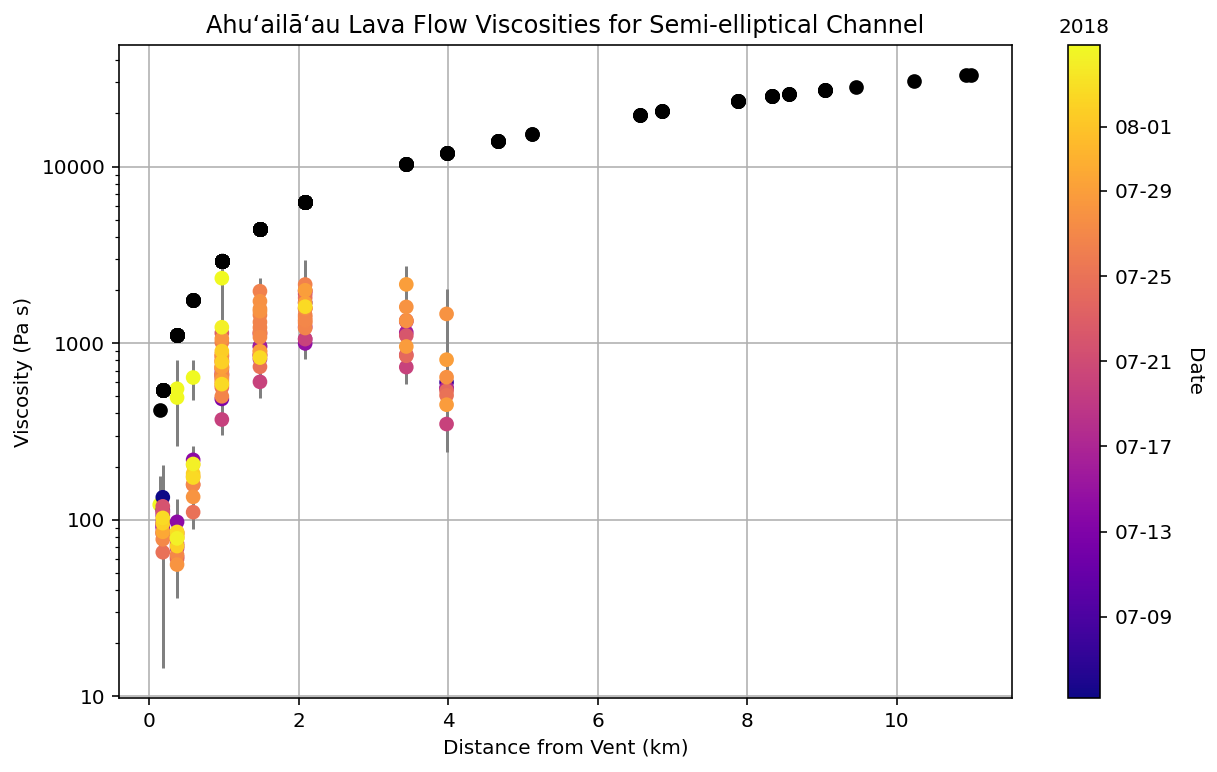

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
startTime = '7/05/18'
endTime = '8/05/18'
Julydf = df.loc[df.Date>= startTime ]
Julydf = Julydf.loc[Julydf.Date <= endTime]

z=mdates.date2num(Julydf.Date)

#plt.errorbar(Julydf['Vent_Distance']/1000, Julydf['Visc_jeff'],Julydf['Visc_Error'], fmt ='.', color='gray')

#plt.scatter(Julydf['Vent_Distance']/1000, Julydf['Visc_jeff'], s=40 , c=z, zorder=10)
#plt.errorbar(df['Vent_Distance']/1000, df['Visc_jeff'], df['Vis_error'], fmt='o') #), c=df['Vent_Distance']/1000)

plt.errorbar(Julydf['Vent_Distance']/1000, Julydf['Visc_Ellip'],Julydf['Visc_Ellip_error'], fmt ='.', color='gray')

plt.scatter(Julydf['Vent_Distance']/1000, Julydf['Visc_Ellip'], s=40 , c=z, cmap = 'plasma', zorder=10)




cb = plt.colorbar()
loc = mdates.AutoDateLocator()
cb.ax.yaxis.set_major_locator(loc)
cb.ax.yaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
cb.set_label('Date', labelpad=15, rotation=270)
cb.ax.set_title('2018', fontsize=10)

plt.scatter(Julydf['Vent_Distance']/1000, (3*Julydf['Vent_Distance']) , s=40 , color='k', zorder=10)



plt.title('Ahuʻailāʻau Lava Flow Viscosities for Semi-elliptical Channel')
plt.xlabel('Distance from Vent (km)')
plt.ylabel('Viscosity (Pa s)')


#myFmt = mdates.DateFormatter('%m/%d')
#ax.xaxis.set_major_formatter(myFmt)
#cbar = plt.colorbar()
#cbar.set_label('Vent Distance km', labelpad=15, rotation=270)

plt.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
plt.yscale('log')
#ax.set_yticks([50, 100, 150, 200, 300, 500, 700, 1000, 1500, 2000, 3000])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.grid(True, which="both", ls="-", color='lightgrey')
plt.grid()
#ax.set_facecolor('#262626')
#ax.set_facecolor('lightgrey')


Text(0.5, 0.98, 'Ahuʻailāʻau Lava Flow Viscosities')

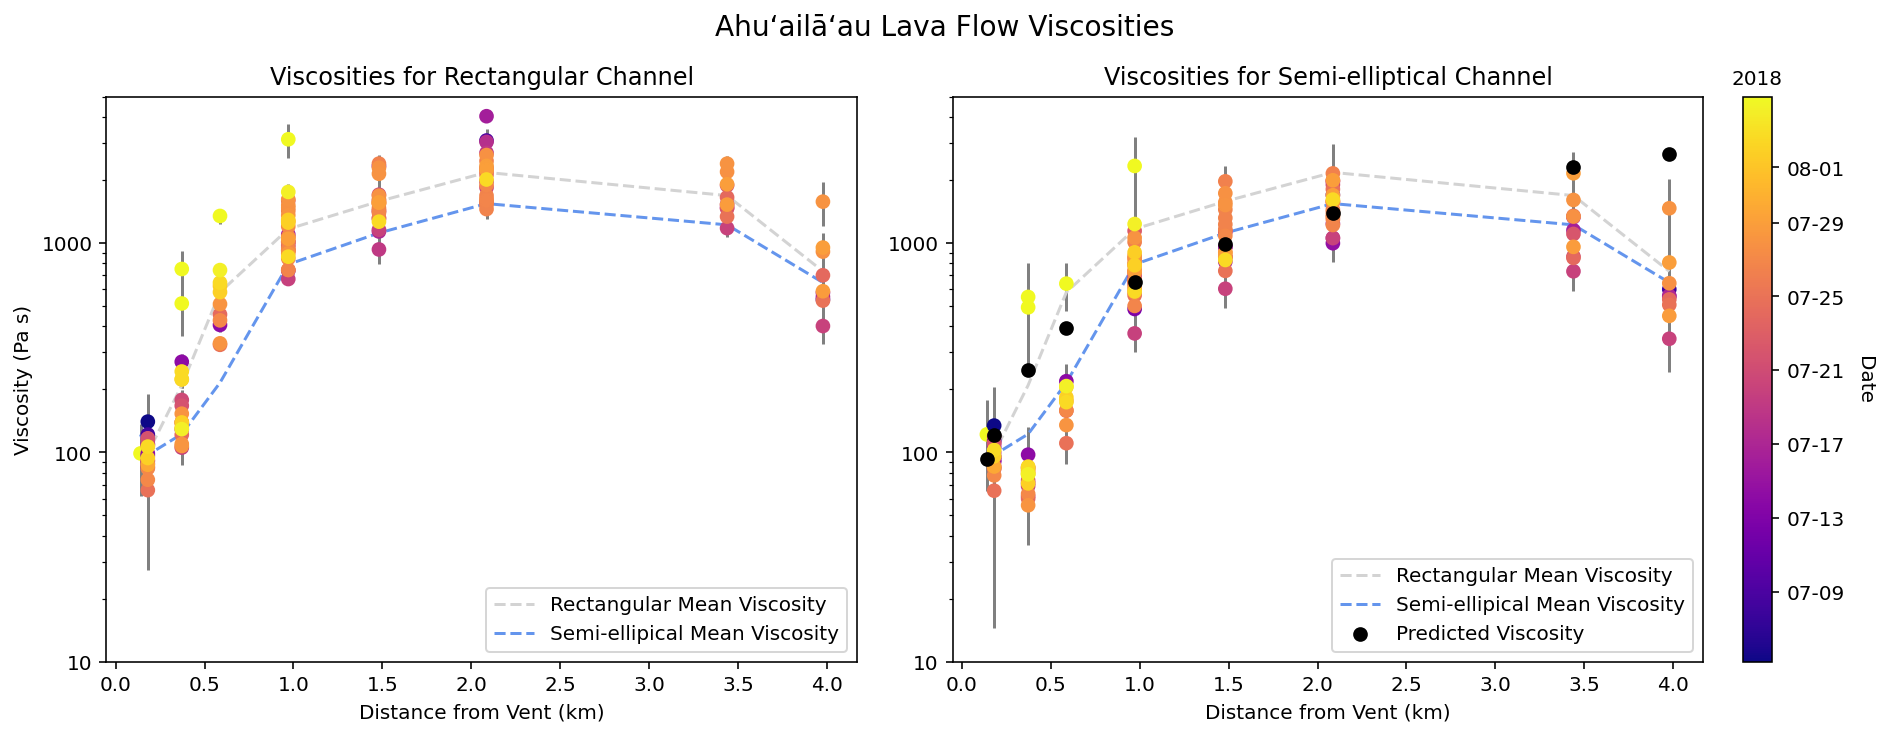

In [40]:
fig, ax = plt.subplots( 1,2,figsize=(13, 5), constrained_layout=True)

startTime = '7/04/18'
endTime = '8/05/18'
Julydf = df.loc[df.Date>= startTime ]
Julydf = Julydf.loc[Julydf.Date <= endTime]

z=mdates.date2num(Julydf.Date)


ax[0].errorbar(Julydf['Vent_Distance']/1000, Julydf['Visc_jeff'],Julydf['Visc_Error'], fmt ='.', color='gray')

rect = ax[0].scatter(Julydf['Vent_Distance']/1000, Julydf['Visc_jeff'], s=40 , c=z, cmap = 'plasma', zorder=10)
#plt.errorbar(df['Vent_Distance']/1000, df['Visc_jeff'], df['Vis_error'], fmt='o') #), c=df['Vent_Distance']/1000)
#cb0 = plt.colorbar(rect, ax=ax[0])
#loc = mdates.AutoDateLocator()
#cb0.ax.yaxis.set_major_locator(loc)
#cb0.ax.yaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#cb0.set_label('Date', labelpad=15, rotation=270)
#cb0.ax.set_title('2018', fontsize=10)

ax[0].set_title('Viscosities for Rectangular Channel')
ax[0].set_xlabel('Distance from Vent (km)')
ax[0].set_ylabel('Viscosity (Pa s)')


#myFmt = mdates.DateFormatter('%m/%d')
#ax.xaxis.set_major_formatter(myFmt)
#cbar = plt.colorbar()
#cbar.set_label('Vent Distance km', labelpad=15, rotation=270)

#ax.set_tick_params(axis='y', which='minor')
#ax[0].yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax[0].set_yscale('log')
#ax[0].grid()
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


ax[1].errorbar(Julydf['Vent_Distance']/1000, Julydf['Visc_Ellip'],Julydf['Visc_Ellip_Error'], fmt ='.', color='gray')
ellip = ax[1].scatter(Julydf['Vent_Distance']/1000, Julydf['Visc_Ellip'], s=40 , c=z, cmap = 'plasma', zorder=10)
cb = plt.colorbar(ellip, ax=ax[1], aspect=50)
loc = mdates.AutoDateLocator()
cb.ax.yaxis.set_major_locator(loc)
cb.ax.yaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
cb.set_label('Date', labelpad=15, rotation=270)
cb.ax.set_title('2018', fontsize=10)

ax[1].set_title('Viscosities for Semi-elliptical Channel')
ax[1].set_xlabel('Distance from Vent (km)')
#ax[1].set_ylabel('Viscosity (Pa s)')
#ax[1].set_yticks([])

#myFmt = mdates.DateFormatter('%m/%d')
#ax.xaxis.set_major_formatter(myFmt)
#cbar = plt.colorbar()
#cbar.set_label('Vent Distance km', labelpad=15, rotation=270)

plt.tick_params(axis='y', which='minor')
ax[1].yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax[1].set_yscale('log')
#plt.yticks([])
#ax.set_yticks([50, 100, 150, 200, 300, 500, 700, 1000, 1500, 2000, 3000])
ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.grid(True, which="both", ls="-", color='lightgrey')
#ax[1].grid()
ax[1].set_ylim(10, 5000)
ax[0].set_ylim(10, 5000)

ax[1].plot(Julydf.groupby('Site').mean().Vent_Distance/1000,Julydf.groupby('Site').mean().Visc_jeff, linestyle='--', color= 'lightgrey', label='Rectangular Mean Viscosity'  )
ax[0].plot(Julydf.groupby('Site').mean().Vent_Distance/1000,Julydf.groupby('Site').mean().Visc_jeff, linestyle='--', color= 'lightgrey', label='Rectangular Mean Viscosity' )

ax[1].plot(Julydf.groupby('Site').mean().Vent_Distance/1000,Julydf.groupby('Site').mean().Visc_Ellip, linestyle='--', color='cornflowerblue', label='Semi-ellipical Mean Viscosity' )
ax[0].plot(Julydf.groupby('Site').mean().Vent_Distance/1000,Julydf.groupby('Site').mean().Visc_Ellip, linestyle='--', color='cornflowerblue', label='Semi-ellipical Mean Viscosity' )
#ax[0].scatter(Julydf.groupby('Site').mean().Vent_Distance[:8]/1000, (2/3)*Julydf.groupby('Site').mean().Vent_Distance[:8]) , s=40 , color='k', zorder=10)
ax[1].scatter(Julydf.groupby('Site').mean().Vent_Distance[:8]/1000, ((2/3)*Julydf.groupby('Site').mean().Vent_Distance[:8]) , s=40 , color='k', zorder=10, label = 'Predicted Viscosity')




ax[0].legend(loc ='lower right')
ax[1].legend(loc ='lower right')

plt.suptitle('Ahuʻailāʻau Lava Flow Viscosities', fontsize=14)


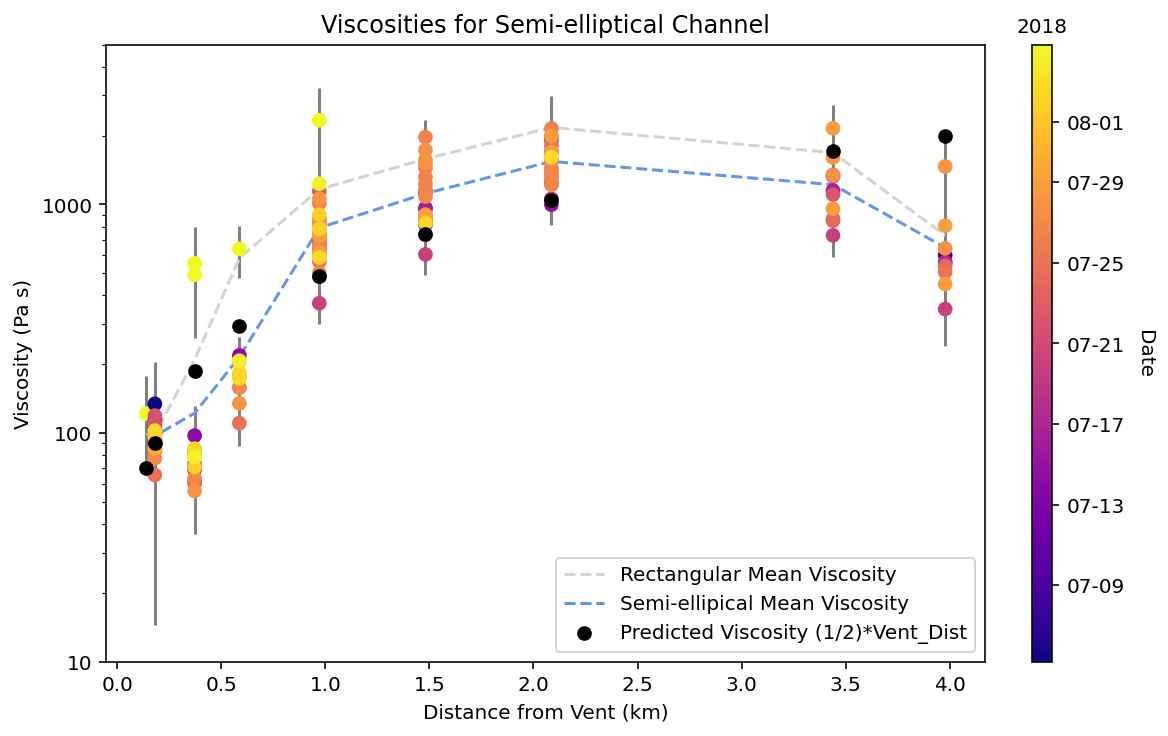

In [36]:
#Single figure

fig, ax = plt.subplots( figsize=(8, 5), constrained_layout=True)

startTime = '7/04/18'
endTime = '8/05/18'
Julydf = df.loc[df.Date>= startTime ]
Julydf = Julydf.loc[Julydf.Date <= endTime]

z=mdates.date2num(Julydf.Date)


#ax[0].errorbar(Julydf['Vent_Distance']/1000, Julydf['Visc_jeff'],Julydf['Visc_Error'], fmt ='.', color='gray')

#rect = ax.scatter(Julydf['Vent_Distance']/1000, Julydf['Visc_jeff'], s=40 , c=z, cmap = 'plasma', zorder=10)
#plt.errorbar(df['Vent_Distance']/1000, df['Visc_jeff'], df['Vis_error'], fmt='o') #), c=df['Vent_Distance']/1000)
#cb0 = plt.colorbar(rect, ax=ax[0])
#loc = mdates.AutoDateLocator()
#cb0.ax.yaxis.set_major_locator(loc)
#cb0.ax.yaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#cb0.set_label('Date', labelpad=15, rotation=270)
#cb0.ax.set_title('2018', fontsize=10)

#ax[0].set_title('Viscosities for Rectangular Channel')
#ax[0].set_xlabel('Distance from Vent (km)')
ax.set_ylabel('Viscosity (Pa s)')


#myFmt = mdates.DateFormatter('%m/%d')
#ax.xaxis.set_major_formatter(myFmt)
#cbar = plt.colorbar()
#cbar.set_label('Vent Distance km', labelpad=15, rotation=270)

#ax.set_tick_params(axis='y', which='minor')
#ax[0].yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
#ax[0].set_yscale('log')
#ax[0].grid()
#ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


ax.errorbar(Julydf['Vent_Distance']/1000, Julydf['Visc_Ellip'],Julydf['Visc_Ellip_Error'], fmt ='.', color='gray')
ellip = ax.scatter(Julydf['Vent_Distance']/1000, Julydf['Visc_Ellip'], s=40 , c=z, cmap = 'plasma', zorder=10)
cb = plt.colorbar(ellip, ax=ax, aspect=50)
loc = mdates.AutoDateLocator()
cb.ax.yaxis.set_major_locator(loc)
cb.ax.yaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
cb.set_label('Date', labelpad=15, rotation=270)
cb.ax.set_title('2018', fontsize=10)

ax.set_title('Viscosities for Semi-elliptical Channel')
ax.set_xlabel('Distance from Vent (km)')
#ax[1].set_ylabel('Viscosity (Pa s)')
#ax[1].set_yticks([])

#myFmt = mdates.DateFormatter('%m/%d')
#ax.xaxis.set_major_formatter(myFmt)
#cbar = plt.colorbar()
#cbar.set_label('Vent Distance km', labelpad=15, rotation=270)

plt.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.set_yscale('log')
#plt.yticks([])
#ax.set_yticks([50, 100, 150, 200, 300, 500, 700, 1000, 1500, 2000, 3000])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.grid(True, which="both", ls="-", color='lightgrey')
#ax[1].grid()
ax.set_ylim(10, 5000)
#ax[0].set_ylim(10, 5000)

ax.plot(Julydf.groupby('Site').mean().Vent_Distance/1000,Julydf.groupby('Site').mean().Visc_jeff, linestyle='--', color= 'lightgrey', label='Rectangular Mean Viscosity'  )
#ax[0].plot(Julydf.groupby('Site').mean().Vent_Distance/1000,Julydf.groupby('Site').mean().Visc_jeff, linestyle='--', color= 'lightgrey', label='Rectangular Mean Viscosity' )

ax.plot(Julydf.groupby('Site').mean().Vent_Distance/1000,Julydf.groupby('Site').mean().Visc_Ellip, linestyle='--', color='cornflowerblue', label='Semi-ellipical Mean Viscosity' )
#ax[0].plot(Julydf.groupby('Site').mean().Vent_Distance/1000,Julydf.groupby('Site').mean().Visc_Ellip, linestyle='--', color='cornflowerblue', label='Semi-ellipical Mean Viscosity' )
#ax[0].scatter(Julydf.groupby('Site').mean().Vent_Distance[:8]/1000, (2/3)*Julydf.groupby('Site').mean().Vent_Distance[:8]) , s=40 , color='k', zorder=10)
ax.scatter(Julydf.groupby('Site').mean().Vent_Distance[:8]/1000, ((1/2)*Julydf.groupby('Site').mean().Vent_Distance[:8]) , s=40 , color='k', zorder=10, label = 'Predicted Viscosity (1/2)*Vent_Dist')

#ax[0].legend(loc ='lower right')
ax.legend(loc ='lower right')

#plt.suptitle('Ahuʻailāʻau Lava Flow Viscosities', fontsize=14)

In [159]:
df.Visc_Ellip_avgD_error.argmax()

#fix error anomaly for plotting
#df.Visc_Ellip_avgD_error[180] = df.Visc_Ellip_avgD_error.mean()

180

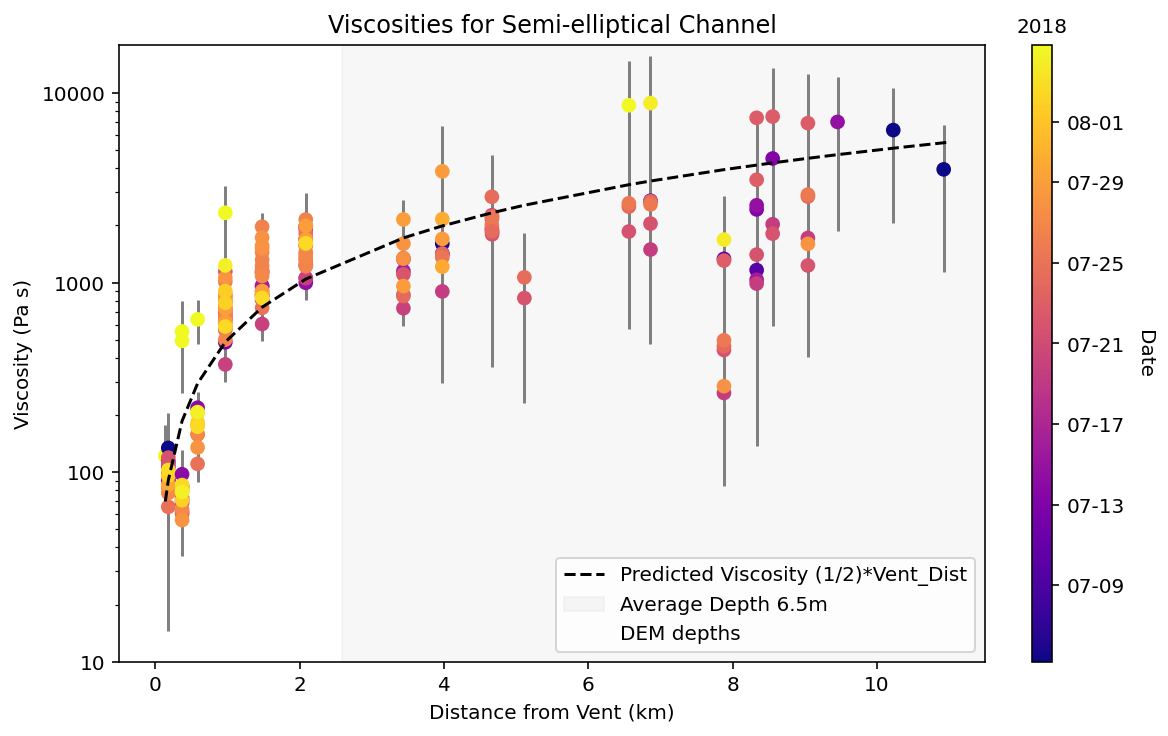

In [155]:
df.Visc_ellip_AvgD[160:]
df.Visc_Ellip_avgD_error[160:]

df.Visc_Ellip



#Single figure

fig, ax = plt.subplots( figsize=(8, 5), constrained_layout=True)

startTime = '7/04/18'
endTime = '8/05/18'
Julydf = df.loc[df.Date>= startTime ]
Julydf = Julydf.loc[Julydf.Date <= endTime]

z=mdates.date2num(Julydf.Date[:137])
z2 = mdates.date2num(Julydf.Date[137:])


#ax[0].errorbar(Julydf['Vent_Distance']/1000, Julydf['Visc_jeff'],Julydf['Visc_Error'], fmt ='.', color='gray')

#rect = ax.scatter(Julydf['Vent_Distance']/1000, Julydf['Visc_jeff'], s=40 , c=z, cmap = 'plasma', zorder=10)
#plt.errorbar(df['Vent_Distance']/1000, df['Visc_jeff'], df['Vis_error'], fmt='o') #), c=df['Vent_Distance']/1000)
#cb0 = plt.colorbar(rect, ax=ax[0])
#loc = mdates.AutoDateLocator()
#cb0.ax.yaxis.set_major_locator(loc)
#cb0.ax.yaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#cb0.set_label('Date', labelpad=15, rotation=270)
#cb0.ax.set_title('2018', fontsize=10)

#ax[0].set_title('Viscosities for Rectangular Channel')
#ax[0].set_xlabel('Distance from Vent (km)')
ax.set_ylabel('Viscosity (Pa s)')


#myFmt = mdates.DateFormatter('%m/%d')
#ax.xaxis.set_major_formatter(myFmt)
#cbar = plt.colorbar()
#cbar.set_label('Vent Distance km', labelpad=15, rotation=270)

#ax.set_tick_params(axis='y', which='minor')
#ax[0].yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
#ax[0].set_yscale('log')
#ax[0].grid()
#ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


ax.errorbar(Julydf['Vent_Distance'][:137]/1000, Julydf['Visc_Ellip'][:137],Julydf['Visc_Ellip_Error'][:137], fmt ='.', color='gray')
ellip = ax.scatter(Julydf['Vent_Distance'][:137]/1000, Julydf['Visc_Ellip'][:137], s=40 , c=z, cmap = 'plasma', zorder=10)

# add mean depth viscosity
ellip2 = ax.scatter(Julydf['Vent_Distance'][137:]/1000, Julydf['Visc_ellip_AvgD'][137:], s=40 , c=z2, cmap = 'plasma', zorder=10)
ax.errorbar(Julydf['Vent_Distance'][137:]/1000, Julydf['Visc_ellip_AvgD'][137:],Julydf['Visc_Ellip_avgD_error'][137:], fmt ='.', color='gray')





cb = plt.colorbar(ellip, ax=ax, aspect=50)
loc = mdates.AutoDateLocator()
cb.ax.yaxis.set_major_locator(loc)
cb.ax.yaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
cb.set_label('Date', labelpad=15, rotation=270)
cb.ax.set_title('2018', fontsize=10)

ax.set_title('Viscosities for Semi-elliptical Channel')
ax.set_xlabel('Distance from Vent (km)')

plt.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.set_yscale('log')
#plt.yticks([])
#ax.set_yticks([50, 100, 150, 200, 300, 500, 700, 1000, 1500, 2000, 3000])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.grid(True, which="both", ls="-", color='lightgrey')
#ax[1].grid()
ax.set_ylim(10, 18000)
ax.set_xlim(-.5, 11.5)


#ax[0].set_ylim(10, 5000)


ax.plot(Julydf.Vent_Distance/1000, (Julydf.Vent_Distance*.5), color='k', zorder=11, label = 'Predicted Viscosity: (1/2)*Dist', linestyle='--')
ax.axvspan((Julydf['Vent_Distance'][137]/1000)+.5, (Julydf['Vent_Distance'][210]/1000)+.6, alpha=0.06, color='gray', label ='Average Depth 6.5m')
ax.axvspan(Julydf['Vent_Distance'][1]/1000, Julydf['Vent_Distance'][137]/100, alpha=0.00, color='white', label ='DEM depths')
ax.legend(loc ='lower right')
#plt.suptitle('Ahuʻailāʻau Lava Flow Viscosities', fontsize=14)



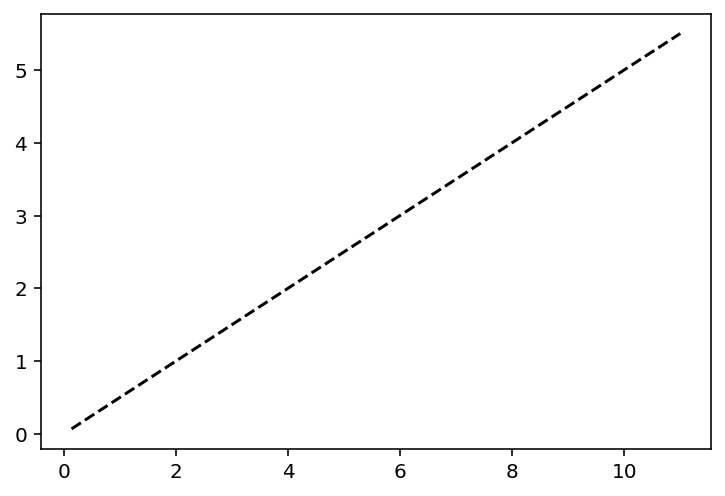

In [148]:
plt.plot(Julydf.Vent_Distance/1000, (Julydf.Vent_Distance/1000)*.5 , color='k', zorder=11, label = 'Predicted Viscosity (1/2)*Vent_Dist', linestyle='--')
plt

In [79]:
Julydf['Vent_Distance'][137]+50

2136

In [42]:
#Julydf.groupby('Site').mean().Visc_Ellip
#Julydf.groupby('Site').mean().Visc_jeff
Julydf.groupby('Site').mean().Vent_Distance
#(1541.284905 - 121.701200)/(2.086-.140) 
Julydf.groupby('Site').mean().Visc_Ellip

Site
1.0      121.701200
1.5       97.098407
2.0      122.173243
3.0      214.935091
4.0      789.788397
5.0     1115.625855
6.0     1541.284905
7.0     1219.971591
8.0      646.796930
9.1             NaN
9.2             NaN
10.0            NaN
12.0            NaN
13.0            NaN
14.0            NaN
15.0            NaN
16.0            NaN
17.0            NaN
17.2            NaN
18.0            NaN
19.0            NaN
21.0            NaN
Name: Visc_Ellip, dtype: float64

In [51]:
df.PIV_Mean.mean()

1.2382556243218923

In [43]:
(df.Visc_Ellip/df.Visc_jeff).mean()

0.7366053566238191

In [46]:
Julydf.groupby('Site').mean().Visc_Ellip/Julydf.groupby('Site').mean().Visc_jeff

Site
1.0     1.232477
1.5     0.980046
2.0     0.584570
3.0     0.369807
4.0     0.677996
5.0     0.706066
6.0     0.709464
7.0     0.724680
8.0     0.883582
9.1          NaN
9.2          NaN
10.0         NaN
12.0         NaN
13.0         NaN
14.0         NaN
15.0         NaN
16.0         NaN
17.0         NaN
17.2         NaN
18.0         NaN
19.0         NaN
21.0         NaN
dtype: float64

In [1374]:
df['visc_diff'] =(df.Visc_jeff/ df.Visc_ellip )#.mean()

#visc_diff[0:160]

#df.groupby('Site').mean().visc_diff.mean()
df['visc_diff'].std()
df.groupby('Site').mean().visc_diff
df.groupby('Site').mean().Vent_Distance/1000

Site
1.0      0.140
1.5      0.181
2.0      0.372
3.0      0.587
4.0      0.971
5.0      1.481
6.0      2.086
7.0      3.439
8.0      3.978
9.1      4.665
9.2      4.668
10.0     5.115
12.0     6.563
13.0     6.863
14.0     7.881
15.0     8.334
16.0     8.556
17.0     9.044
17.2     9.455
18.0    10.227
19.0    10.926
21.0    11.000
Name: Vent_Distance, dtype: float64

We see the rectangular channel profile viscosity is on average 153% +-60%  greater viscosity then the viscosity calculated assuming a semi-elliptical (equation X) 

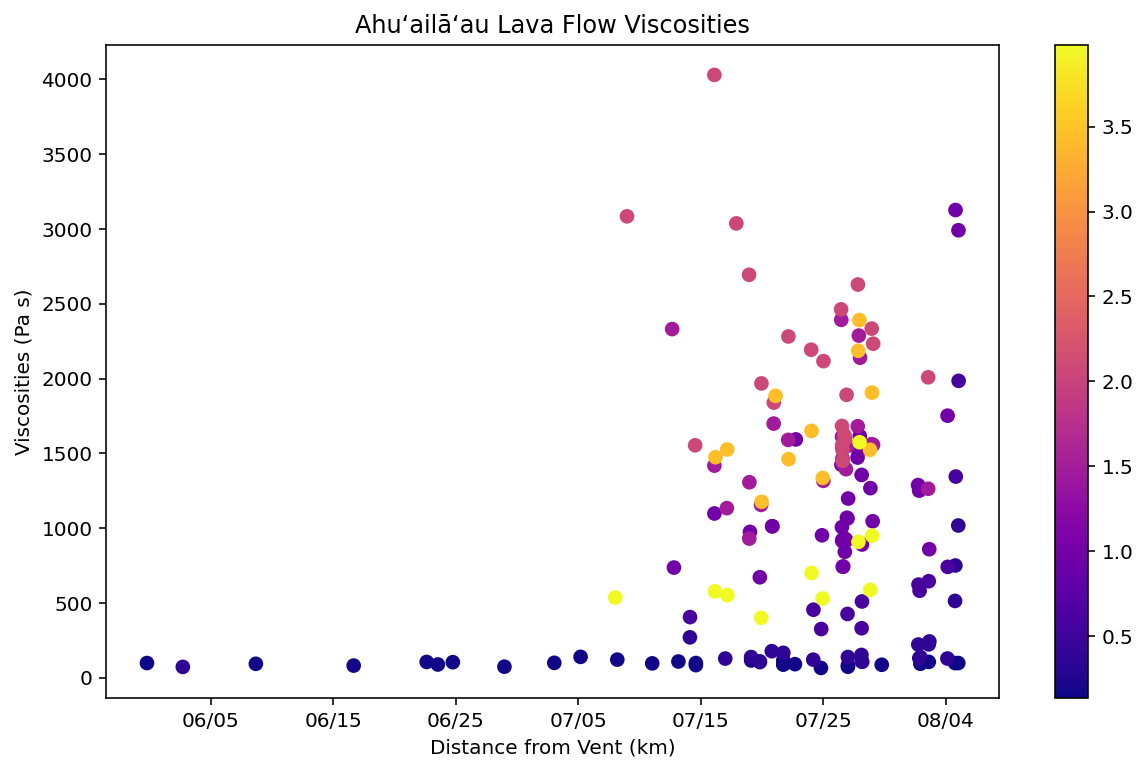

In [582]:
fig, ax = plt.subplots(figsize=(10, 6))
startTime = '5/30/18'
endTime = '8/07/18'
Julydf = df.loc[df.Date>= startTime ]
Julydf = Julydf.loc[Julydf.Date <= endTime]

z=mdates.date2num(Julydf.Date)

#plt.errorbar(Julydf['Vent_Distance']/1000, Julydf['Visc_jeff'],Julydf['Vis_error'], fmt ='.', color='lightgrey')

plt.scatter(z, Julydf['Visc_jeff'], s=40 , c=Julydf['Vent_Distance']/1000, cmap = 'plasma', zorder=10)
#plt.errorbar(df['Vent_Distance']/1000, df['Visc_jeff'], df['Vis_error'], fmt='o') #), c=df['Vent_Distance']/1000)
cb = plt.colorbar()
loc = mdates.AutoDateLocator()

plt.title('Ahuʻailāʻau Lava Flow Viscosities')
plt.xlabel('Distance from Vent (km)')
plt.ylabel('Viscosities (Pa s)')


myFmt = mdates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(myFmt)
#cbar = plt.colorbar()
cbar.set_label('Vent Distance km', labelpad=15, rotation=270)

#plt.tick_params(axis='y', which='minor')
#ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
#plt.yscale('log')

In [641]:
(np.array(std_site_vis[0:9])/np.array(mean_site_vis[0:9]))
#df.Vent_Distance.unique()
#mean_site_vis[0:9]

#np.array(mean_site_vis[0:9])



array([5.77247647e-14, 1.64237707e+01, 2.36804752e+02, 4.88510868e+02,
       5.49239013e+02, 3.90811662e+02, 6.35166360e+02, 3.69476268e+02,
       3.42402674e+02])

In [643]:
#visocsity standard deviation per site
std_site_vis[0:9]


[5.772476473450155e-14,
 16.423770723282097,
 236.80475161286037,
 488.5108682384753,
 549.2390133407631,
 390.8116617049823,
 635.1663602285398,
 369.476267974479,
 342.4026739626]



The viscosity increased from  255 +- 42 Pa s 140 m from the vent to a 5150 +-1505 Pa s at 2086 m from then vent. Vent distance is the primary control on viscosity 
This is due to cooling, degadding + crystallization  + reasons .... 
Proximal vent is isoviscous Newtonian 


Interestingly, the viscosuty at around 3.5 - 4km from the vent decreases to ~. 
This decrease is likely due to non-newtonian behavior (bubbles + higher speeds)

The temporal influence on viscosity is a second control explaining the variance per site in Figure XXX. The grouping of anonomaously high viscosity at the end of the eruption on August 4th and 5th (shown in the yellow dots) indicates a departure 




For future erupt


yellow dots indicating the dates in early August right as the eruption was ending had higher viscosities then the 


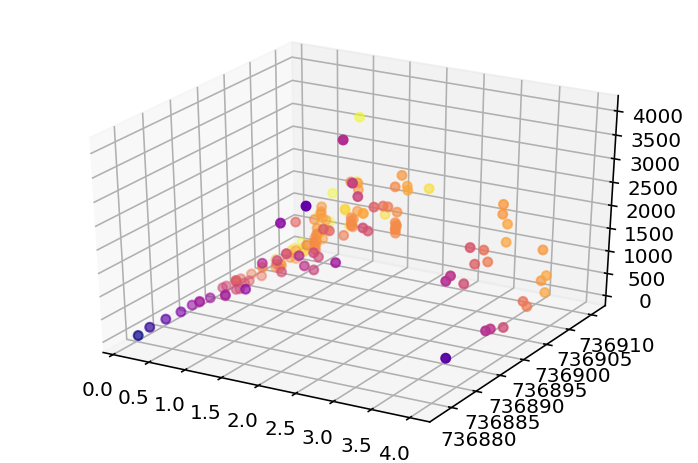

In [589]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')



# Data for three-dimensional scattered points
zdata = Julydf.Visc_jeff
xdata = Julydf.Vent_Distance/1000
ydata=mdates.date2num(Julydf.Date)


ax.scatter3D(xdata, ydata, zdata , c=ydata, cmap='plasma');

myFmt = mdates.DateFormatter('%m/%d')
#ax.xaxis.set_major_formatter(myFmt)



Text(0.5, 1.0, 'Flux')

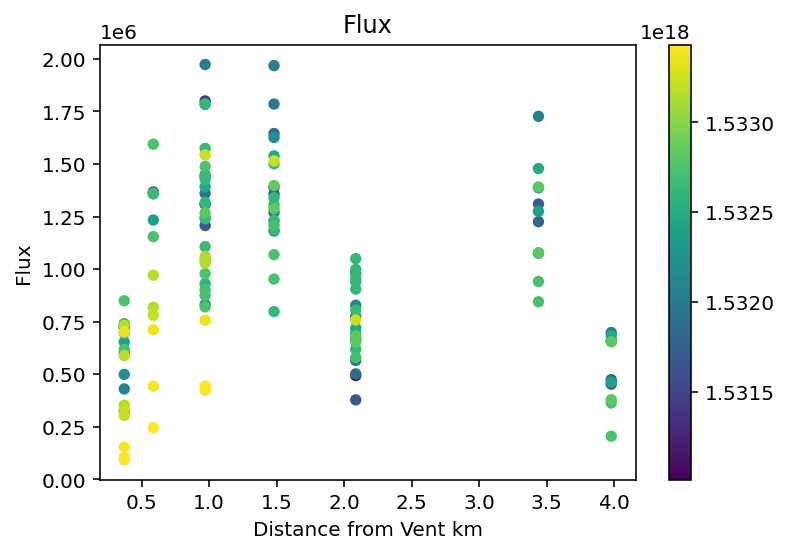

In [1084]:
flux = df['PIV_Mean']*df.Depth_mean*df.Mean_Width* df.Density

plt.scatter(df['Vent_Distance']/1000, flux, c=df.Date, s=22) #), c=df['Vent_Distance']/1000)
plt.colorbar()
plt.xlabel('Distance from Vent km')
plt.ylabel('Flux')
plt.title('Flux')




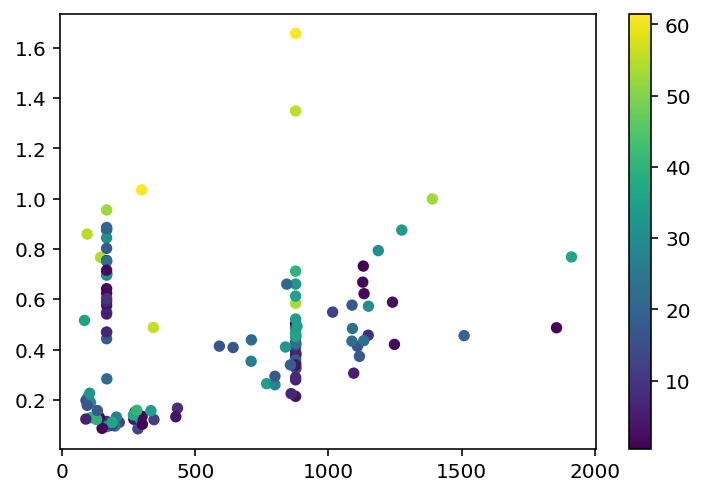

In [658]:
#plt.scatter(df.Vent_Distance,df.Mean_Width/df.Depth_mean, s=22) #), c=df['Vent_Distance']/1000)

#plt.xlabel('Distance from Vent km')
#plt.ylabel('Aspect')
plt.scatter(df.Width_Max_Vel*(2/3)*df.Depth_mean ,1/df.PIV_Max, c =df.Time_after_CC_hours,  s=22) #), c=df['Vent_Distance']/1000)
plt.colorbar()



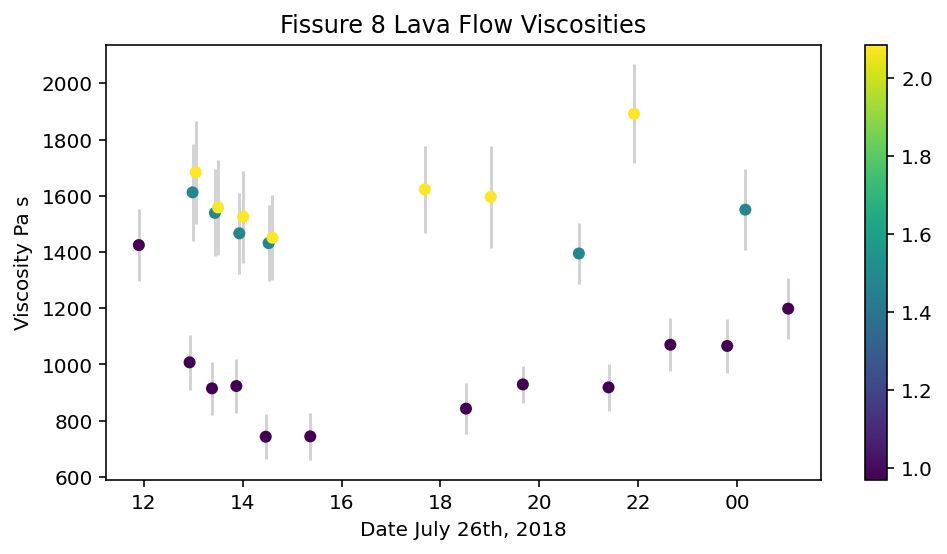

In [659]:
Julydf = df.loc[df.Date >= '7/26/2018  11:54:00']
Julydf = Julydf.loc[Julydf.Date <= '7/27/18 1:024']

Julydf = Julydf.loc[ Julydf.Site < 7 ]
Julydf = Julydf.loc[ Julydf.Site > 3 ]

fig, ax = plt.subplots(figsize=(8, 4))
plt.errorbar(Julydf['Date'], Julydf['Visc_jeff'],Julydf['Vis_error'], fmt ='.', color='lightgrey')


plt.scatter(Julydf['Date'], Julydf['Visc_jeff'], s=25, c=Julydf['Vent_Distance']/1000,  zorder=10)
plt.title('Fissure 8 Lava Flow Viscosities')
plt.xlabel('Date July 26th, 2018')
plt.ylabel('Viscosity Pa s')
myFmt = mdates.DateFormatter('%H')
ax.xaxis.set_major_formatter(myFmt)
plt.colorbar()
cbar.set_label('Vent Distance' , rotation=270)

    
    
    #plt.text(vline, 2.1, 'Caldera Colapse Event', rotation=90, color = 'orangered')#trans)



In [1236]:
# mean viscosities per site

mean_site_vis = []
mean_site_vis_e = []
Vent_dist = []
std_site_vis = []
std_site_vis_e = []



for i in range(df.Site.nunique()):
    dfSite = df[df.Site == np.unique(df.Site.values)[i]]
    #print(dfSite.Visc_jeff.mean())   
    mean_site_vis.append(dfSite.Visc_jeff.mean())
    Vent_dist.append(dfSite.Vent_Distance.mean()/1000)
    std_site_vis.append(dfSite.Visc_jeff.std())
    mean_site_vis_e.append(dfSite.Visc_ellip.mean())
    std_site_vis_e.append(dfSite.Visc_ellip.std())
    
    



Site_group = df.groupby('Site')

#Site_group.mean()

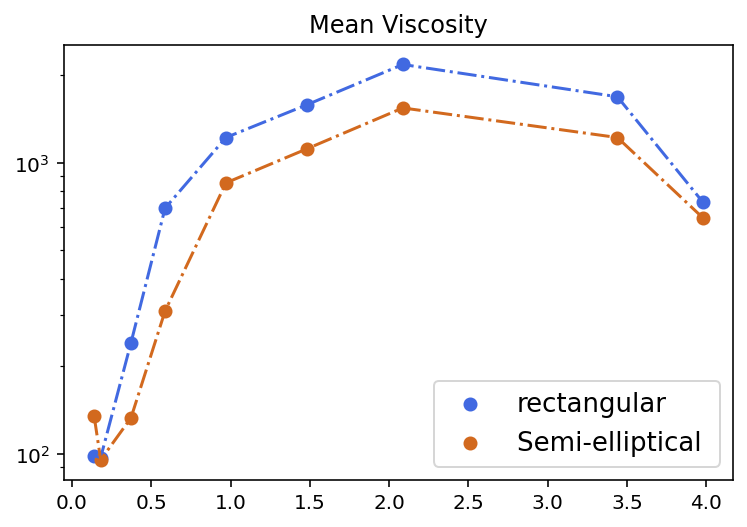

In [1298]:
plt.plot( Vent_dist, mean_site_vis, linestyle='-.', color = 'royalblue')
plt.scatter( Vent_dist, mean_site_vis, label ='rectangular', color = 'royalblue')


#plt.errorbar( Vent_dist, mean_site_vis,  std_site_vis,  label = 'Stdv')

plt.plot( Vent_dist, mean_site_vis_e, linestyle='-.', color = 'chocolate')
plt.scatter( Vent_dist, mean_site_vis_e, label ='Semi-elliptical ', color = 'chocolate')


#plt.errorbar( Vent_dist, mean_site_vis_e,  std_site_vis_e, label = 'Stdv')

#plt.xlabel('Distance From Vent')
#plt.ylabel('Log Mean Viscosity ')
plt.title('Mean Viscosity')
plt.legend(loc ='lower right', prop={"size":13})
plt.yscale('log')
#plt.xticks([])
#plt.yticks([])





In [1278]:
(np.array(mean_site_vis) / np.array(mean_site_vis_e))

array([0.7323442 , 1.01835569, 1.81020211, 2.25352826, 1.43106155,
       1.41629898, 1.40951522, 1.37992001, 1.1317574 ,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan])

Text(0.5, 1.0, 'Mean Viscosity (Jeff) Sites 1-8 ')

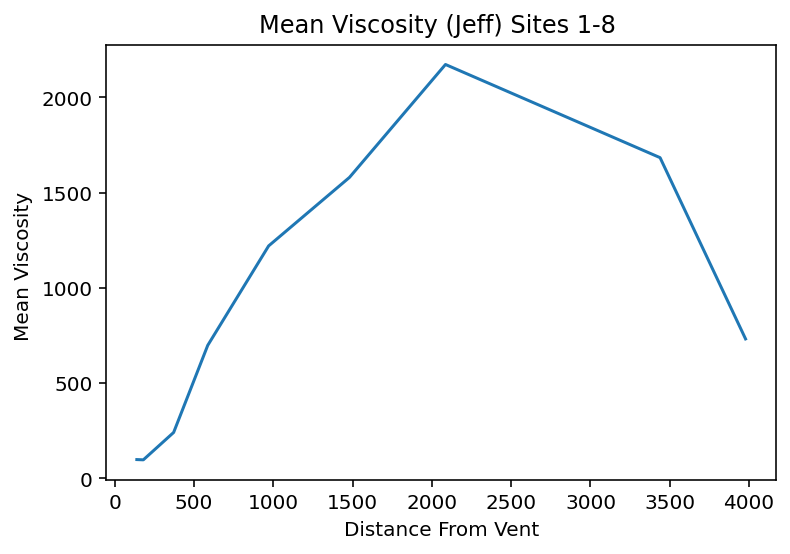

In [662]:
plt.plot( Vent_dist[:9], mean_site_vis[:9])
plt.xlabel('Distance From Vent')
plt.ylabel('Mean Viscosity ')
plt.title('Mean Viscosity (Jeff) Sites 1-8 ')


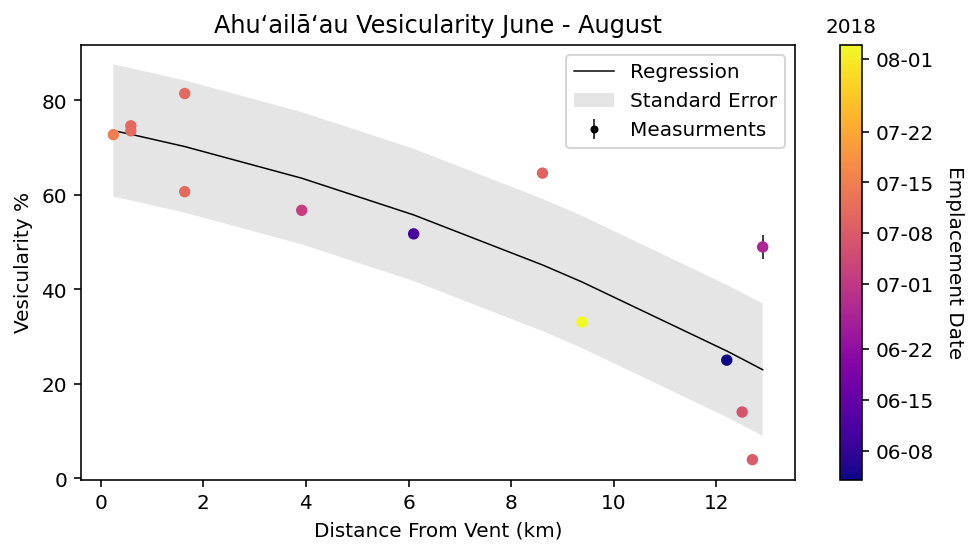

In [553]:
fig, ax = plt.subplots(figsize=(8, 4))

vesic =pd.read_excel('/Volumes/LaCie/LAVA-USB/KLERZ_results/Vesic_Brenna.xlsx',header=0, sep =',',  parse_dates=['Emplacement_Date'])

plt.xlabel('Distance From Vent (km)')
plt.ylabel('Vesicularity %')
plt.title('Ahuʻailāʻau Vesicularity June - August')
#error = df.Vesic_Error.mean()*100
#plt.fill_between(df.Vent_Distance/1000, y-error, y+error,
#    alpha=0.15, facecolor='k',
#    linewidth=0 , antialiased=True, label ='Standard Error')



#plot measurments

error = vesic['Vesic_error']*100
plt.errorbar(vesic.Vent_Distance, vesic.Vesicularity*100, yerr=error, fmt=".", label = 'Measurments', color='k', linewidth=.75 )
s = plt.scatter(vesic.Vent_Distance, vesic.Vesicularity*100, s=22,  c=mdates.date2num(vesic.Emplacement_Date) , cmap = 'plasma', zorder=10) # c=vesic.Emplacement_Date
cb = plt.colorbar()
loc = mdates.AutoDateLocator()
cb.ax.yaxis.set_major_locator(loc)
cb.ax.yaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
cb.set_label('Emplacement Date', labelpad=15, rotation=270)
cb.ax.set_title('2018', fontsize=10)



#plot error
fit = -0.0014*vesic.Vent_Distance**2-0.0216*vesic.Vent_Distance+.7415
plt.plot(vesic.Vent_Distance,fit*100, linestyle='-', c ='k', label = 'Regression', linewidth=.75 )
error2 = 14
plt.fill_between(vesic.Vent_Distance, fit*100-error2, fit*100+error2,
    alpha=0.1, facecolor='k',
    linewidth=0 , antialiased=True, label ='Standard Error')

plt.legend()

plt.show()


#### Density Plot

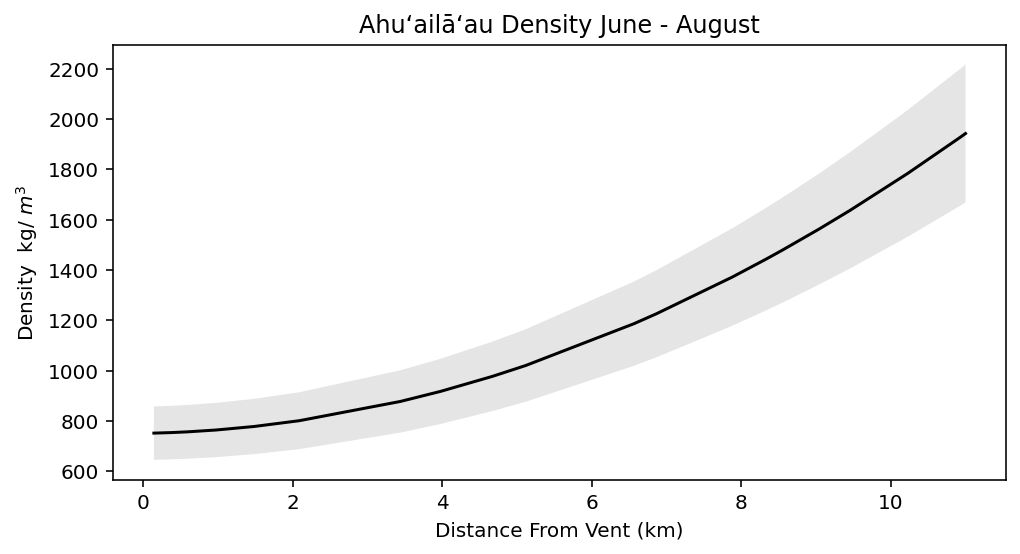

In [675]:
fig, ax = plt.subplots(figsize=(8, 4))
x = df.Vent_Distance/1000
y = df.Density
plt.plot( x, y, c ='k')
plt.xlabel('Distance From Vent (km)')
plt.ylabel('Density  kg/ $m^3$')
plt.title('Ahuʻailāʻau Density June - August')
yerr=df.Density_Error
#plot measurments
plt.fill_between(x, y-yerr, y+yerr,  alpha=0.1, facecolor='k' )
plt.show()

In [556]:
#df.PIV_Mean
df.Mean_Width[30:210]

30     71.094871
31     76.370768
32     67.635267
33     61.494469
34     61.840429
         ...    
205    70.402950
206    70.921891
207    73.689574
208    59.678176
209    95.398592
Name: Mean_Width, Length: 180, dtype: float64

In [419]:
#df.Mean_Width[30:209].values

# Velocity Relationships

### Mean + MAX Channel Width to Velocity

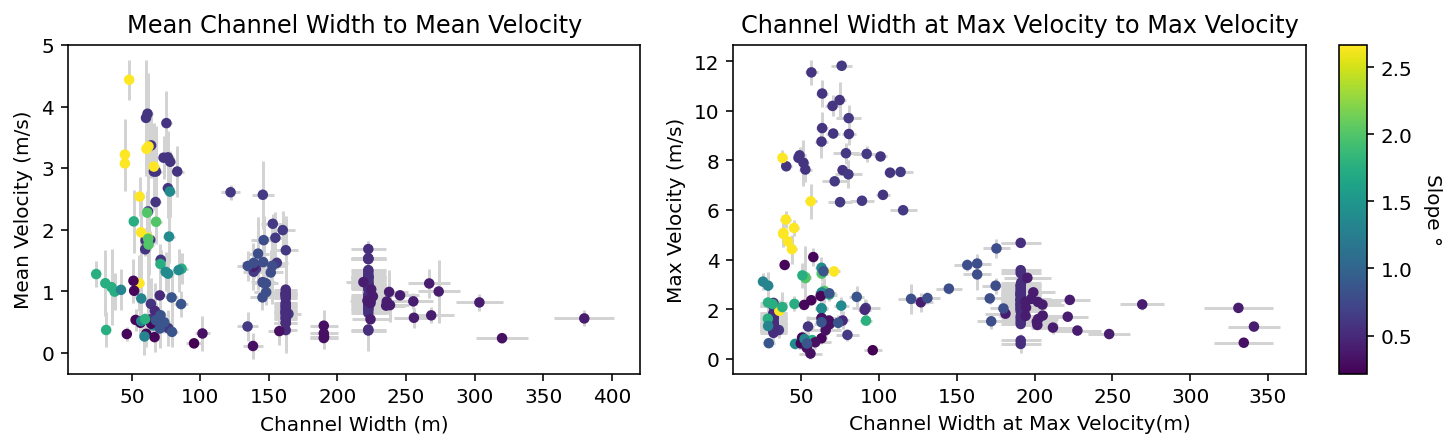

In [42]:
fig, ax = plt.subplots( 1,2,figsize=(10, 3),  constrained_layout=True)
ax[0].errorbar(df.Mean_Width.values,df.PIV_Mean.values, yerr=df.Time_Stdv,xerr=(df.Width_Error_Lowerbound + df.Mean_Width*.05), fmt ='.', color='lightgrey')
ax[0].scatter(df.Mean_Width.values,df.PIV_Mean.values, c=df.Slope_D, s=18, zorder=10) #  color='steelblue',
ax[0].set_title('Mean Channel Width to Mean Velocity')
ax[0].set_xlabel('Channel Width (m)')
ax[0].set_ylabel('Mean Velocity (m/s)')


ax[1].errorbar(df.Width_Max_Vel.values,df.PIV_Max.values, yerr=df.Time_Stdv,xerr=(df.Width_Error_Lowerbound + df.Mean_Width*.05), fmt ='.', color='lightgrey')
maxV = ax[1].scatter(df.Width_Max_Vel.values,df.PIV_Max.values, c=df.Slope_D, s=18, zorder=10) # color='mediumblue'
ax[1].set_title('Channel Width at Max Velocity to Max Velocity')
ax[1].set_xlabel('Channel Width at Max Velocity(m)')
ax[1].set_ylabel('Max Velocity (m/s)')

cb = plt.colorbar(maxV, ax=ax[1], aspect = 40)
cb.set_label('Slope °', labelpad=15, rotation=270)


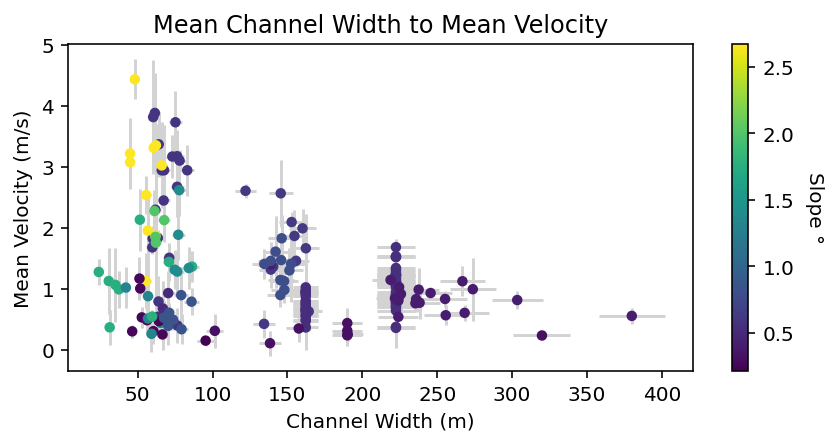

In [48]:
fig, ax = plt.subplots( 1,1,figsize=(7, 3))
plt.errorbar(df.Mean_Width.values,df.PIV_Mean.values, yerr=df.Time_Stdv,xerr=(df.Width_Error_Lowerbound + df.Mean_Width*.05), fmt ='.', color='lightgrey')
plt.scatter(df.Mean_Width.values,df.PIV_Mean.values, c=df.Slope_D, s=18, zorder=10) #  color='steelblue',
plt.title('Mean Channel Width to Mean Velocity')
plt.xlabel('Channel Width (m)')
plt.ylabel('Mean Velocity (m/s)')

cb = plt.colorbar(maxV)
cb.set_label('Slope °', labelpad=15, rotation=270)

### Vent Distance to Mean and Max Velocities

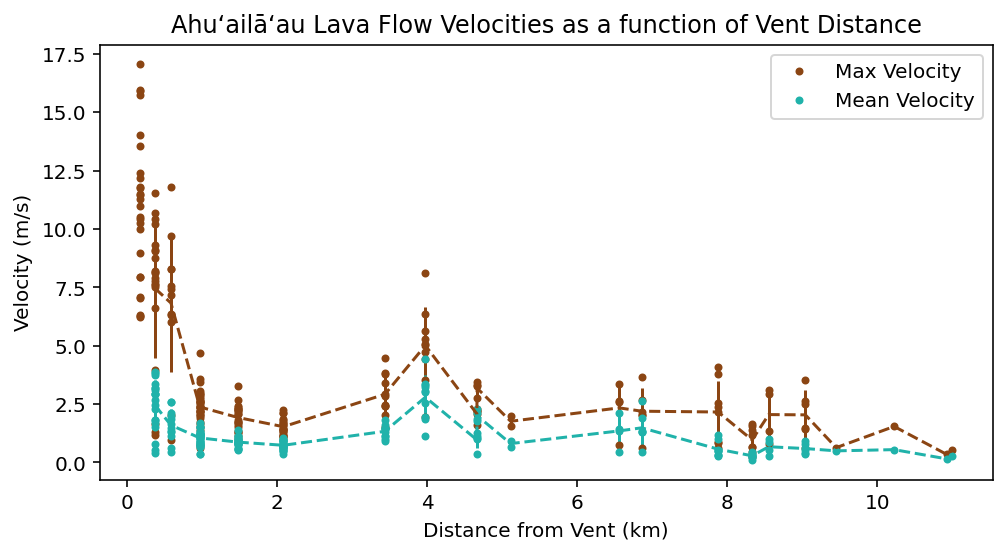

In [103]:
fig, ax = plt.subplots(figsize=(8, 4))

x1 = df.groupby('Site').mean().Vent_Distance[2:]/1000
y1 =df.groupby('Site').mean().PIV_Max[2:]
#err =df.groupby('Site').mean().Time_Stdv[2:]
err =df.groupby('Site').std().PIV_Max[2:]
x2 = df.groupby('Site').mean().Vent_Distance[2:]/1000
y2 =df.groupby('Site').mean().PIV_Mean[2:]
err2 =df.groupby('Site').std().PIV_Mean[2:]

X = (df['Vent_Distance'][3:]/1000) #* np.sin(df['Slope_D'])
Y = df['PIV_Max'][3:]
plt.plot(X, Y, '.', color ='saddlebrown',  label = 'Max Velocity' ) #, edgecolors='black')
mean = df['PIV_Mean'][3:]
plt.plot(X, mean, '.', color ='lightseagreen', label = 'Mean Velocity' ) #, edgecolors='black')

plt.errorbar(x1,y1,err, color ='saddlebrown' , linestyle= '--')

#mean vel per site
plt.errorbar(x2,y2,err2, color ='lightseagreen', linestyle='--')


plt.title('Ahuʻailāʻau Lava Flow Velocities as a function of Vent Distance')
plt.xlabel('Distance from Vent (km)')
plt.ylabel('Velocity (m/s)')
plt.legend() #loc="upper left", #bbox_to_anchor=(.6,1)
plt.show()


In [7]:
df

,Site,Date,PIV_Max,PIV_Mean,Time_Stdv,Ratio_Mean2Max,Vent_Distance,Altitude,x_image,y_image,...,Volumetric_Flux,Volumetric_Flux_Error,DRE_Flux,DRE_Flux_Error,Mass_Flow_Rate,Mass_Flow_Rate_Error,Capillary,Reynolds,Froude,Peclet
0,1.0,2018-05-30 19:32:00,4.040000,NaN,0.430000,NaN,140,NaN,NaN,NaN,...,404.859189,117.147818,112.709802,65.814727,3.043165e+05,97980.191951,NaN,184.809039,0.515426,7.497392e+06
1,1.0,2018-08-04 18:25:00,2.200000,NaN,0.160000,NaN,140,NaN,NaN,NaN,...,162.691916,45.444176,45.292226,26.225432,1.222890e+05,38274.853074,NaN,69.169363,0.326737,3.012813e+06
2,1.0,2018-08-05 00:46:00,0.700000,NaN,0.230000,NaN,140,NaN,NaN,NaN,...,29.199742,13.015268,8.128992,5.488885,2.194828e+04,10262.192598,NaN,9.051364,0.138422,5.407360e+05
3,1.5,2018-06-08 16:49:00,7.075800,NaN,0.452700,NaN,181,NaN,NaN,NaN,...,642.814660,200.079900,179.026623,106.505529,4.833719e+05,165209.777157,NaN,437.155010,0.795357,1.691618e+07
4,1.5,2018-06-16 16:25:00,12.168800,NaN,1.144300,NaN,181,NaN,NaN,NaN,...,1354.530944,432.956015,377.242643,226.097012,1.018555e+06,355917.936609,NaN,1061.760072,1.235716,3.564555e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,17.0,2018-07-27 04:01:00,2.643809,0.611178,0.158819,0.231173,9044,351.3,2720.0,1530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,17.2,2018-07-15 21:39:00,0.632888,0.495914,0.169301,0.783573,9455,304.8,3840.0,2160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,18.0,2018-07-07 19:50:00,1.540754,0.547925,0.103880,0.355622,10227,305.1,2720.0,1530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,19.0,2018-07-07 19:45:00,0.347980,0.153941,0.080377,0.442386,10926,305.3,2720.0,1530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


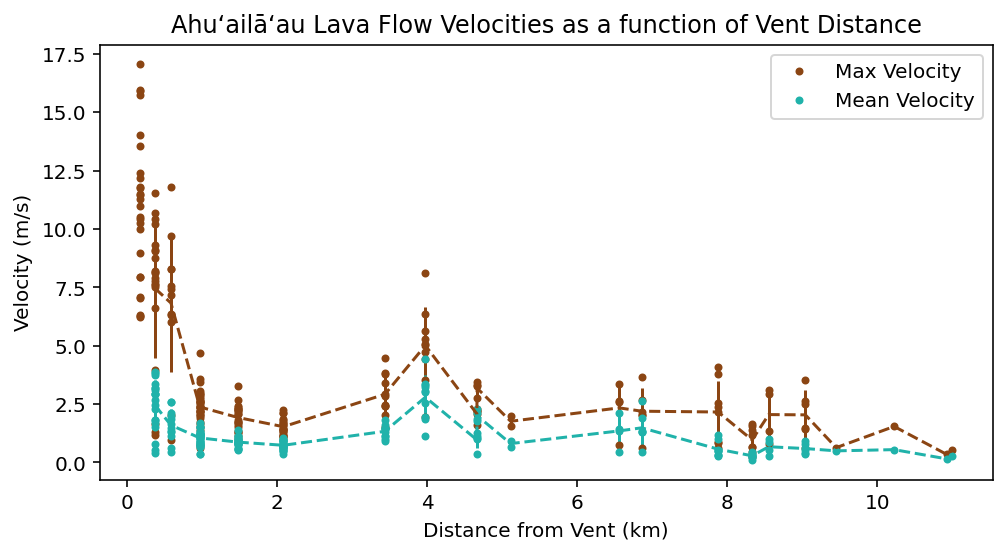

In [95]:
fig, ax = plt.subplots(figsize=(8, 4))

x1 = df.groupby('Site').mean().Vent_Distance[2:]/1000
y1 =df.groupby('Site').mean().PIV_Max[2:]
#err =df.groupby('Site').mean().Time_Stdv[2:]
err =df.groupby('Site').std().PIV_Max[2:]
x2 = df.groupby('Site').mean().Vent_Distance[2:]/1000
y2 =df.groupby('Site').mean().PIV_Mean[2:]
err2 =df.groupby('Site').std().PIV_Mean[2:]

X = (df['Vent_Distance'][3:]/1000) #* np.sin(df['Slope_D'])
Y = df['PIV_Max'][3:]
plt.plot(X, Y, '.', color ='saddlebrown',  label = 'Max Velocity' ) #, edgecolors='black')
mean = df['PIV_Mean'][3:]
plt.plot(X, mean, '.', color ='lightseagreen', label = 'Mean Velocity' ) #, edgecolors='black')

plt.errorbar(x1,y1,err, color ='saddlebrown' , linestyle= '--')

#mean vel per site
plt.errorbar(x2,y2,err2, color ='lightseagreen', linestyle='--')


plt.title('Ahuʻailāʻau Lava Flow Velocities as a function of Vent Distance')
plt.xlabel('Distance from Vent (km)')
plt.ylabel('Velocity (m/s)')
plt.legend() #loc="upper left", #bbox_to_anchor=(.6,1)
#plt.show()

#plt.plot(df.groupby('Site').mean().Vent_Distance[2:]/1000, (df.groupby('Site').mean().Slope_D[2:] * 1/(df.groupby('Site').mean().Vent_Distance[2:]/1000))*Scaling_coeff)



### Fitting Velocity profile as a function of distance from the vent and slope

In [44]:
mean_velbySite = df.groupby('Site').mean().PIV_Mean[1.5:]
slope_mean = df.groupby('Site').mean().Slope_D[1.5:]
slope_correlation = mean_velbySite.corr(slope_mean)
slope_correlation
distance_correlation = mean_velbySite.corr( 1/(df.groupby('Site').mean().Vent_Distance[1.5:]/1000))
distance_correlation, slope_correlation

(0.5152001723007057, 0.5510083675799806)

In [35]:
max_velbySite = df.groupby('Site').mean().PIV_Max[1.5:]
slope_mean = df.groupby('Site').mean().Slope_D[1.5:]
slope_correlationMax = max_velbySite.corr(slope_mean)
distance_correlationMax = max_velbySite.corr( 1/(df.groupby('Site').mean().Vent_Distance[1.5:]/1000))
distance_correlation, slope_correlation, distance_correlationMax, slope_correlationMax


(0.5152001723007057,
 0.5510083675799806,
 0.9001279315298389,
 0.09233615534920367)

In [46]:
#density
mean_velbySite = df.groupby('Site').mean().PIV_Mean[2:]
max_velbySite = df.groupby('Site').mean().PIV_Max[2:]

density_mean = df.groupby('Site').mean().Density[2:]
density_correlation = mean_velbySite.corr(1/density_mean)
density_correlationMax = max_velbySite.corr(1/density_mean)


density_correlation, density_correlationMax

(0.6245720639344842, 0.6634554395179905)

In [5]:
#correlation = df4['Max velocity'].corr(df4['Max_Sit6'])
dvent_slope = (df.groupby('Site').mean().Slope_D[2:] * 1/(df.groupby('Site').mean().Vent_Distance[2:]/1000))
mean_velbySite = df.groupby('Site').mean().PIV_Mean[2:]
#correlation 
correlation = mean_velbySite.corr(dvent_slope)
correlation
print('76% of the mean surface velocity of the flow can be modeled using just slope and 1/distance from vent (with input effusion velocity)')

76% of the mean surface velocity of the flow can be modeled using just slope and 1/distance from vent (with input effusion velocity)


In [91]:
#add an empirically derived scaling factor
vel2distSlop = mean_velbySite/ dvent_slope

#factor in average and amount of data points
df.Site.value_counts(sort=False)[2:]

Scaling_coeff = (vel2distSlop * df.Site.value_counts(sort=False)[2:]).sum()/ df.Site.value_counts(sort=False)[2:].sum()

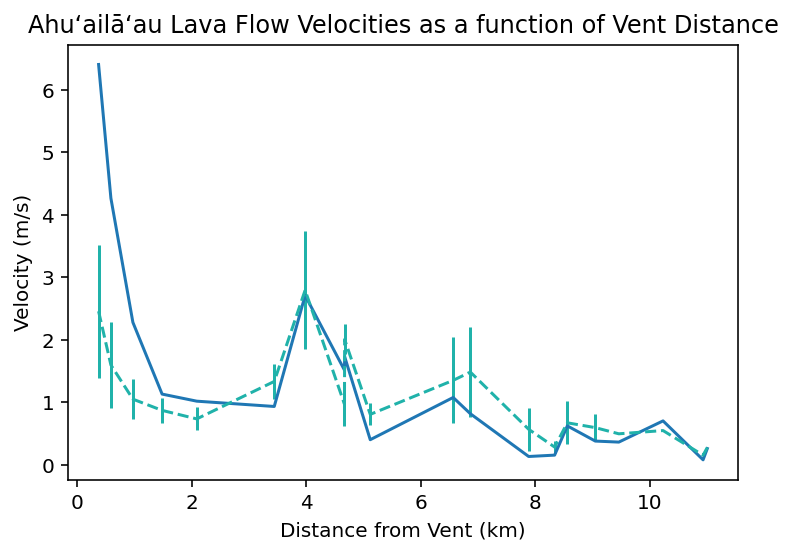

In [92]:

plt.plot(df.groupby('Site').mean().Vent_Distance[2:]/1000, (df.groupby('Site').mean().Slope_D[2:] * 1/(df.groupby('Site').mean().Vent_Distance[2:]/1000))*Scaling_coeff)
#df.groupby('Site').mean().Slope_D
#df.groupby('Site').mean().Slope_D

x1 = df.groupby('Site').mean().Vent_Distance[2:]/1000
y1 =df.groupby('Site').mean().PIV_Max[2:]
#plt.errorbar(x1,y1,err, color ='saddlebrown' , linestyle= '--')

x2 = df.groupby('Site').mean().Vent_Distance[2:]/1000
y2 =df.groupby('Site').mean().PIV_Mean[2:]
err2 =df.groupby('Site').std().PIV_Mean[2:]


plt.errorbar(x2,y2,err2, color ='lightseagreen', linestyle='--')

plt.title('Ahuʻailāʻau Lava Flow Velocities as a function of Vent Distance')
plt.xlabel('Distance from Vent (km)')
plt.ylabel('Velocity (m/s)')
#plt.legend() #loc="upper left", #bbox_to_anchor=(.6,1)
#plt.yscale('log')
plt.show()





In [896]:
df.groupby('Site').mean().Visc_jeff, df.groupby('Site').mean().Vis_error
#df.groupby('Site').mean().Vent_Distance
#(54.000000 +32.461538 +69.217662)/3

(Site
 1.0       98.745211
 1.5       97.370288
 2.0      241.050463
 3.0      698.199729
 4.0     1220.244222
 5.0     1580.059749
 6.0     2172.464693
 7.0     1683.463237
 8.0      732.017199
 9.1             NaN
 9.2             NaN
 10.0            NaN
 12.0            NaN
 13.0            NaN
 14.0            NaN
 15.0            NaN
 16.0            NaN
 17.0            NaN
 17.2            NaN
 18.0            NaN
 19.0            NaN
 21.0            NaN
 Name: Visc_jeff, dtype: float64,
 Site
 1.0      40.136445
 1.5      43.151459
 2.0      35.846759
 3.0      51.713856
 4.0     146.397582
 5.0     150.251057
 6.0     252.084280
 7.0     182.670993
 8.0     144.358373
 9.1            NaN
 9.2            NaN
 10.0           NaN
 12.0           NaN
 13.0           NaN
 14.0           NaN
 15.0           NaN
 16.0           NaN
 17.0           NaN
 17.2           NaN
 18.0           NaN
 19.0           NaN
 21.0           NaN
 Name: Vis_error, dtype: float64)

In [881]:
(148.071069+222.500000+243.118960+162.255448+145.303386)/5

184.2497726

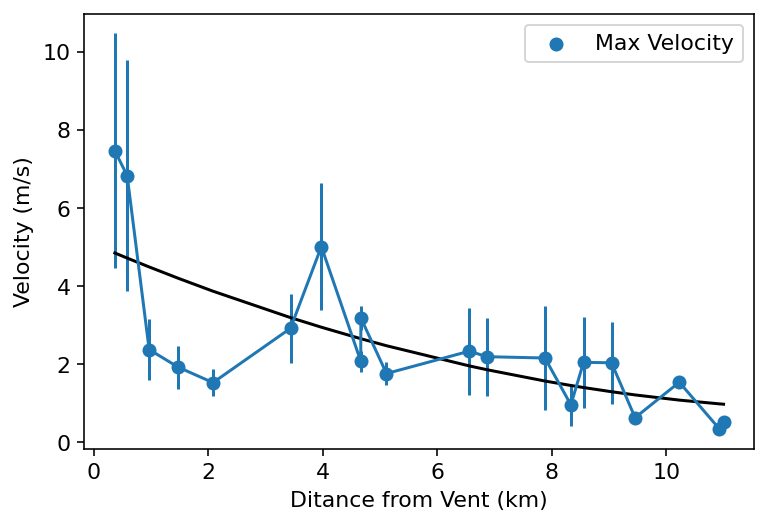

In [891]:
x1 = df.groupby('Site').mean().Vent_Distance[2:]/1000
y1 =df.groupby('Site').mean().PIV_Max[2:]
#err =df.groupby('Site').mean().Time_Stdv[2:]
err =df.groupby('Site').std().PIV_Max[2:]




plt.scatter(x1,y1, label = 'Max Velocity')
plt.errorbar(x1,y1,err)


#x2 = df.groupby('Site').mean().Vent_Distance[2:]/1000
#y2 =df.groupby('Site').mean().PIV_Mean[2:]
#err2 =df.groupby('Site').std().PIV_Mean[2:]

#plt.scatter(x2,y2, label = 'Mean Velocity')
#plt.errorbar(x2,y2,err2)

plt.legend()
plt.ylabel('Velocity (m/s)')
plt.xlabel('Ditance from Vent (km)')


a, b, c = np.polyfit(x1, y1,2)
    
    
#plt.text(vline, 2.1, 'Caldera Colapse Event', rotation=90, color = 'orangered')#trans)


    
    
plt.plot(x1,a*x1**2+b*x1+c, '-', color = 'k')


### Date to Mean and Max Velocities

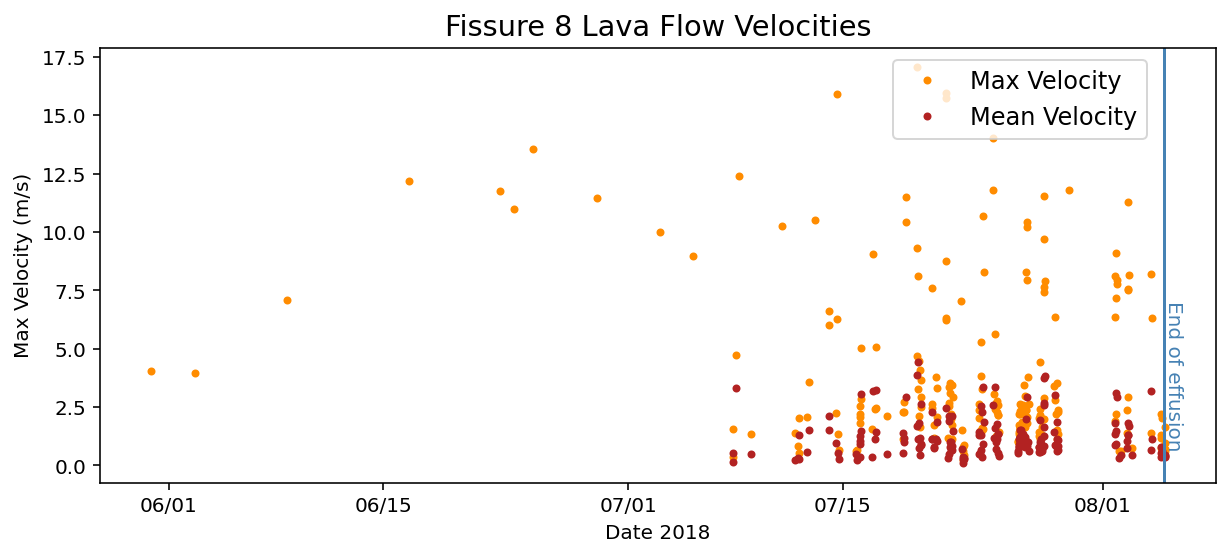

In [48]:
fig, ax = plt.subplots(figsize=(10, 4))


X = df['Date']
Y = df['PIV_Max']
plt.plot(X, Y, '.', color ='darkorange', label = 'Max Velocity')
mean = df['PIV_Mean']
plt.plot(X, mean, '.', color ='firebrick', label = 'Mean Velocity')

#trans = ax.get_xaxis_transform()

vline = dt.datetime(2018, 8, 5)
plt.axvline(dt.datetime(2018, 8, 5), ls='-', color = 'steelblue' )

plt.text(vline, .8, 'End of effusion', rotation=-90, color = 'steelblue')#trans)


plt.rcParams.update({'font.size': 12})

plt.title('Fissure 8 Lava Flow Velocities')
plt.xlabel('Date 2018')
plt.ylabel('Max Velocity (m/s)')
#plt.setp(ax.get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(.7,1), loc="upper left")
myFmt = mdates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(myFmt)

plt.show()

### Analysis by Site

In [49]:
#Site_group.mean()

#### Relationship of mean to Maximum velocity

In [113]:
#(df.PIV_Mean/df.PIV_Max)

Sites.sort_values(by='Vel_Mean/Max')
df.insert(1,'ratio_Mean2Max',(df.PIV_Mean/df.PIV_Max).values)
df

,Site,ratio_Mean2Max,Date,PIV_Max,PIV_Mean,Time_Stdv,Vent_Distance,Altitude,x_image,y_image,...,Slope_Radians,Slope_D,Vesicularity,Vesic_Error,Density,Density_Error,Visc_jeff,Pulsing,Time_after_CC_days,Time_after_CC_hours
0,1.0,NaN,2018-05-30 19:32:00,4.040000,NaN,0.430000,140,NaN,NaN,NaN,...,0.013963,0.800,0.721607,0.1412,1948.339980,275.105605,255.952476,0.0,0.359826,8.635833
1,1.0,NaN,2018-08-04 18:25:00,2.200000,NaN,0.160000,140,NaN,NaN,NaN,...,0.013963,0.800,0.721607,0.1412,1948.339980,275.105605,255.952476,0.0,2.270694,54.496667
2,1.0,NaN,2018-08-05 00:46:00,0.700000,NaN,0.230000,140,NaN,NaN,NaN,...,0.013963,0.800,0.721607,0.1412,1948.339980,275.105605,255.952476,0.0,2.535278,60.846667
3,1.5,NaN,2018-06-08 16:49:00,7.075800,NaN,0.452700,181,NaN,NaN,NaN,...,0.013963,0.800,0.721496,0.1412,1948.038489,275.063035,242.489782,0.0,0.586343,14.072222
4,1.5,NaN,2018-06-16 16:25:00,12.168800,NaN,1.144300,181,NaN,NaN,NaN,...,0.013963,0.800,0.721496,0.1412,1948.038489,275.063035,211.681618,0.0,0.254653,6.111667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,17.0,0.231173,2018-07-27 04:01:00,2.643809,0.611178,0.158819,9044,351.3,2720.0,1530.0,...,0.014853,0.851,0.421151,0.1412,1137.107225,160.559540,NaN,NaN,0.660984,15.863611
207,17.2,0.783573,2018-07-15 21:39:00,0.632888,0.495914,0.169301,9455,304.8,3840.0,2160.0,...,0.014853,0.851,0.393882,0.1412,1063.482514,150.163731,NaN,NaN,0.758970,18.215278
208,18.0,0.355622,2018-07-07 19:50:00,1.540754,0.547925,0.103880,10227,305.1,2720.0,1530.0,...,0.031067,1.780,0.339466,0.1412,916.559411,129.418189,NaN,NaN,1.073171,25.756111
209,19.0,0.442386,2018-07-07 19:45:00,0.347980,0.153941,0.080377,10926,305.3,2720.0,1530.0,...,0.003770,0.216,0.286597,0.1412,773.812532,109.262329,NaN,NaN,1.069699,25.672778


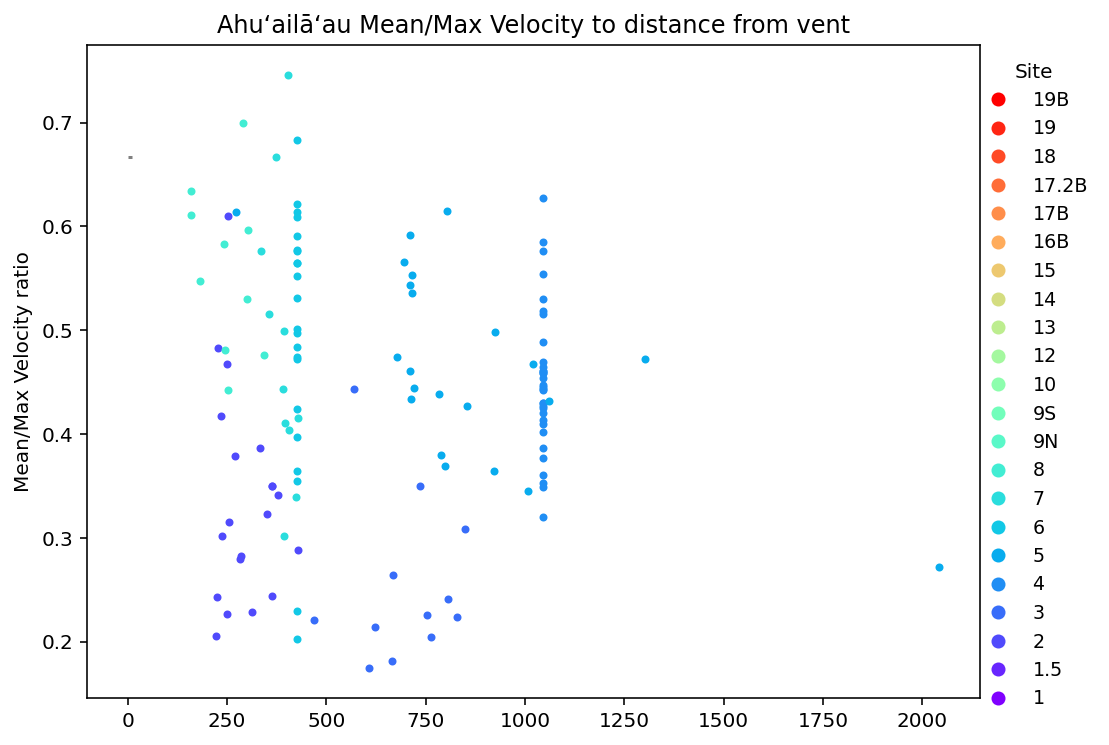

In [116]:
#(df.PIV_Mean/df.PIV_Max).mean()
(df.PIV_Mean/df.PIV_Max) #.groupby('Site')
Sites = df[['Site']]
Sites.insert(1,'Vel_Mean/Max',(df.PIV_Mean/df.PIV_Max).values)
Sites.groupby('Site').mean()

#plt.plot(Sites.Site.unique(), Sites.groupby('Site')['Vel_Mean/Max'].mean())
Sites.groupby('Site')['Vel_Mean/Max'].mean()
#Sites.groupby('Site')['Vel_Mean/Max'].std()

colors = cm.rainbow(np.linspace(0, 1, 22))
#Julydf = df.loc[df.Date> '7/7/18 19:45']

fig, ax = plt.subplots(figsize=(8,6))

for i in range(Sites.Site.nunique()):
    #plt.plot(X, (3/2)*X, c='grey')
    dfSite = df[df.Site == np.unique(df.Site.values)[i]]
    Y = dfSite['ratio_Mean2Max']
    X = (dfSite['Mean_Width']/dfSite['Depth_mean'])**2
    plt.title('Ahuʻailāʻau Mean/Max Velocity to distance from vent')
    #plt.xlabel('Distance from Vent')
    plt.ylabel('Mean/Max Velocity ratio')
    #myFmt = mdates.DateFormatter('%m/%d/%y')
    #ax.xaxis.set_major_formatter(myFmt)
    plt.plot(X, Y, '.', color = colors[i], label = 'Site ' + str(np.unique(df.Site.values)[i]))
    plt.grid()
    #handles, labels = ax.get_legend_handles_labels()
labels = ['1', '1.5', '2', '3', '4', '5', '6', '7', '8', '9N', '9S', '10', '12', '13', '14', '15', '16B', '17B', '17.2B', '18', '19', '19B']
plt.hlines((2/3),xmin=.1, xmax=11, color='grey', linestyle='--', label= 'Newtonian viscous flow' ) 
plt.legend(handles[::-1], labels[::-1],bbox_to_anchor=(.98,1), frameon=False, loc="upper left", title="Site", fontsize='9.5')




Text(7.2, 0.68, 'Newtonian Viscous Flow')

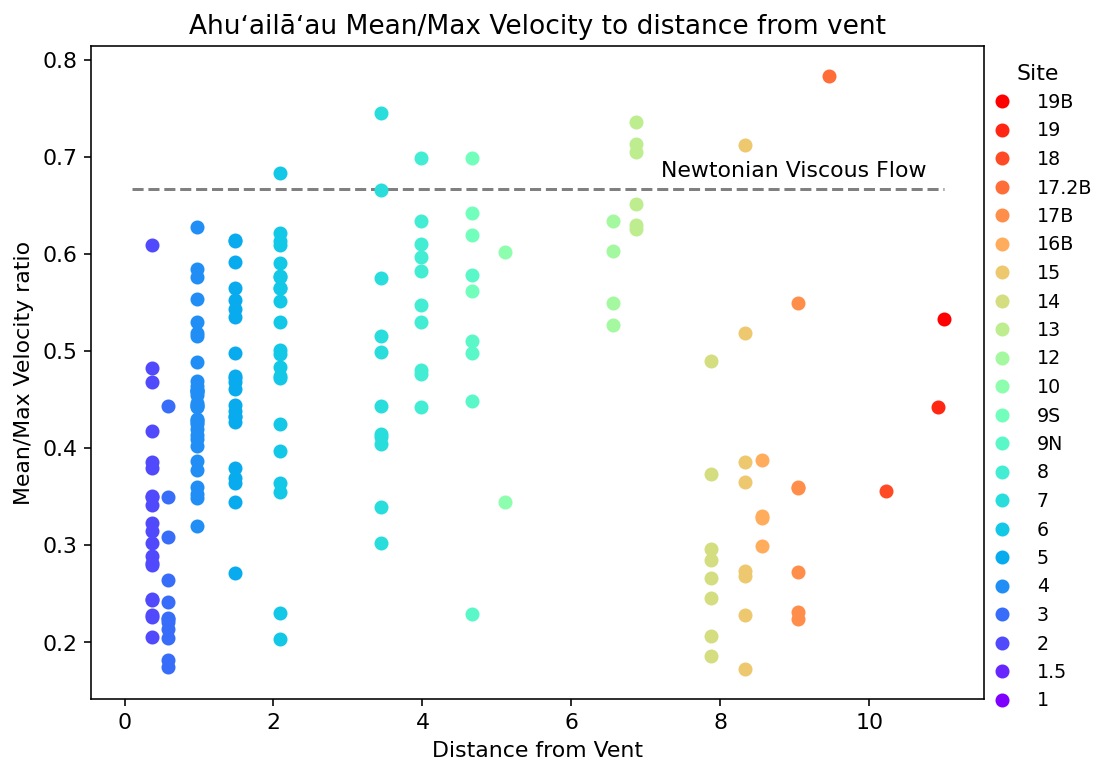

In [71]:
#(df.PIV_Mean/df.PIV_Max).mean()
(df.PIV_Mean/df.PIV_Max) #.groupby('Site')
Sites = df[['Site']]
Sites.insert(1,'Vel_Mean/Max',(df.PIV_Mean/df.PIV_Max).values)
Sites.groupby('Site').mean()

#plt.plot(Sites.Site.unique(), Sites.groupby('Site')['Vel_Mean/Max'].mean())
Sites.groupby('Site')['Vel_Mean/Max'].mean()
#Sites.groupby('Site')['Vel_Mean/Max'].std()

colors = cm.rainbow(np.linspace(0, 1, 22))
#Julydf = df.loc[df.Date> '7/7/18 19:45']

fig, ax = plt.subplots(figsize=(8,6))
plt.rcParams.update({'font.size': 11})
for i in range(Sites.Site.nunique()):
    #plt.plot(X, (3/2)*X, c='grey')
    dfSite = df[df.Site == np.unique(df.Site.values)[i]]
    Y = dfSite['PIV_Mean']/dfSite['PIV_Max']
    X = dfSite['Vent_Distance']/1000
    plt.title('Ahuʻailāʻau Mean/Max Velocity to distance from vent')
    plt.xlabel('Distance from Vent')
    plt.ylabel('Mean/Max Velocity ratio')
    #myFmt = mdates.DateFormatter('%m/%d/%y')
    #ax.xaxis.set_major_formatter(myFmt)
    plt.plot(X, Y, 'o', color = colors[i], label = 'Site ' + str(np.unique(df.Site.values)[i]))
    plt.grid()
    handles, labels = ax.get_legend_handles_labels()
labels = ['1', '1.5', '2', '3', '4', '5', '6', '7', '8', '9N', '9S', '10', '12', '13', '14', '15', '16B', '17B', '17.2B', '18', '19', '19B']
plt.hlines((2/3),xmin=.1, xmax=11, color='grey', linestyle='--', label= 'Newtonian viscous flow' ) 
plt.legend(handles[::-1], labels[::-1],bbox_to_anchor=(.98,1), frameon=False, loc="upper left", title="Site", fontsize='9.5')
plt.text(7.2, .68, 'Newtonian Viscous Flow')


In [ ]:
ratio = np.array(Sites.groupby('Site')['Vel_Mean/Max'].mean())
ratio_std = np.array(Sites.groupby('Site')['Vel_Mean/Max'].std().fillna(0))
ratio_Sites =Sites.Site.unique()

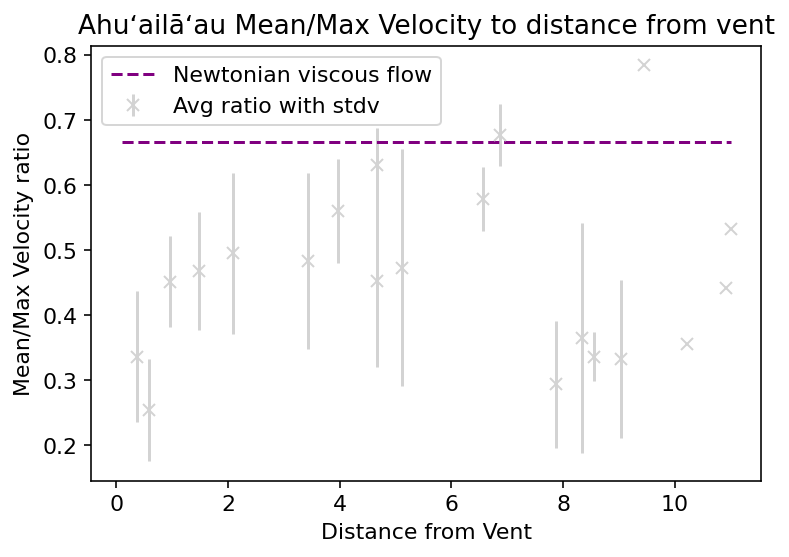

In [723]:
plt.errorbar(np.array(df.groupby('Site')['Vent_Distance'].mean()/1000), ratio, ratio_std, fmt="x" , color = 'lightgray' , label = 'Avg ratio with stdv')
plt.title('Ahuʻailāʻau Mean/Max Velocity to distance from vent')
plt.xlabel('Distance from Vent')
plt.ylabel('Mean/Max Velocity ratio')
plt.hlines((2/3),xmin=.1, xmax=11, color='purple', linestyle='--', label= 'Newtonian viscous flow' ) 
plt.legend()


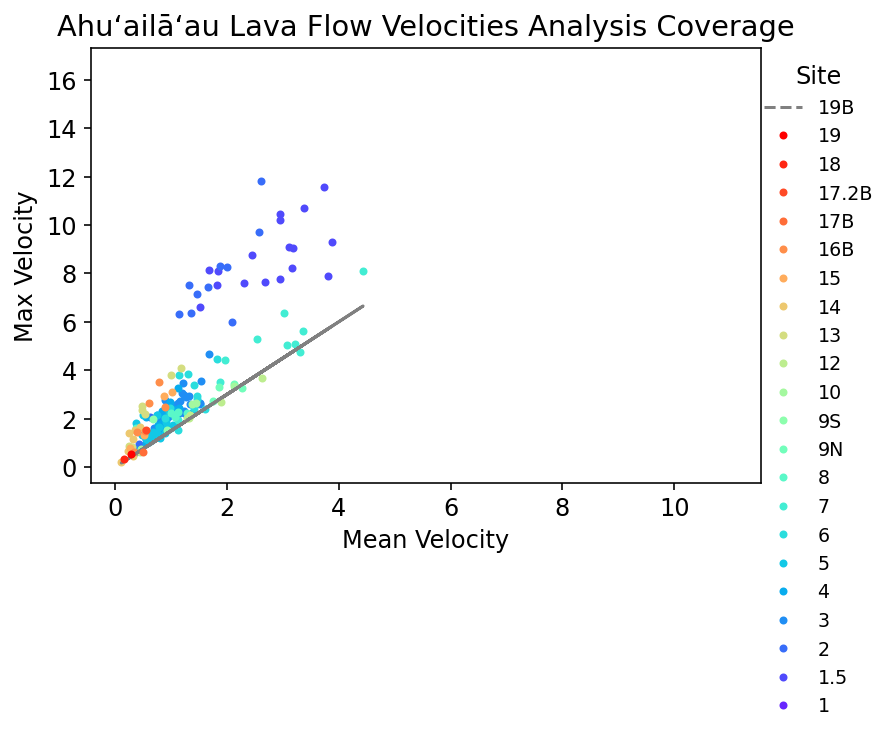

In [65]:
#(df.PIV_Mean/df.PIV_Max).mean()
(df.PIV_Mean/df.PIV_Max) #.groupby('Site')
Sites = df[['Site']]
Sites.insert(1,'Vel_Mean/Max',(df.PIV_Mean/df.PIV_Max).values)
Sites.groupby('Site').mean()
#plt.plot(Sites.Site.unique(), Sites.groupby('Site')['Vel_Mean/Max'].mean())
Sites.groupby('Site')['Vel_Mean/Max'].mean()
#Sites.groupby('Site')['Vel_Mean/Max'].std()

colors = cm.rainbow(np.linspace(0, 1, 22))
#Julydf = df.loc[df.Date> '7/7/18 19:45']


for i in range(Sites.Site.nunique()):
    plt.plot(X, (3/2)*X, c='grey')
    dfSite = df[df.Site == np.unique(df.Site.values)[i]]
    X = dfSite['PIV_Mean']
    Y = dfSite['PIV_Max']
    plt.title('Ahuʻailāʻau Lava Flow Velocities Analysis Coverage')
    plt.xlabel('Mean Velocity')
    plt.ylabel('Max Velocity')
    myFmt = mdates.DateFormatter('%m/%d/%y')
    ax.xaxis.set_major_formatter(myFmt)
    plt.plot(X, Y, '.', color = colors[i], label = 'Site ' + str(np.unique(df.Site.values)[i]))
    plt.grid()
    handles, labels = ax.get_legend_handles_labels()
    labels = ['1', '1.5', '2', '3', '4', '5', '6', '7', '8', '9N', '9S', '10', '12', '13', '14', '15', '16B', '17B', '17.2B', '18', '19', '19B']

    plt.legend(handles[::-1], labels[::-1],bbox_to_anchor=(.98,1), frameon=False, loc="upper left", title="Site", fontsize='9.5')
    
    
    #plt.yticks(range(1,22,1))
    #ax.axes.yaxis.set_ticklabels([]) 

    #plt.errorbar(Sites.Site.unique()[i], Sites.groupby('Site')['Vel_Mean/Max'].mean()[i], yerr=Sites.groupby('Site')['Vel_Mean/Max'].std()[i], fmt="o" , color = colors[i] ) #, label = 'Site ' + str(np.unique(Julydf.Site.values)[i]))
    #handles, labels = ax.get_legend_handles_labels()
    #labels = ['1', '1.5', '2', '3', '4', '5', '6', '7', '8', '9N', '9S', '10', '12', '13', '14', '15', '16B', '17B', '17.2B', '18', '19', '19B']
    #plt.legend(handles[::-1], labels[::-1],bbox_to_anchor=(.98,1), frameon=False, loc="upper left", title="Site", fontsize='9.5')
  


In [66]:
#Sites.Site.unique()[9]
#Sites.groupby('Site')['Vel_Mean/Max'].mean()
yerr = np.array(Sites.groupby('Site')['Vel_Mean/Max'].std().fillna(0))
#yerr=Sites.groupby('Site')['Vel_Mean/Max'].std().fillna(0)[i+2]
#Sites.Site.unique()[i+2]
Sites.Site.unique()
Sites.groupby('Site')['Vel_Mean/Max'].mean()
Sites.Site.unique()[11]

10.0

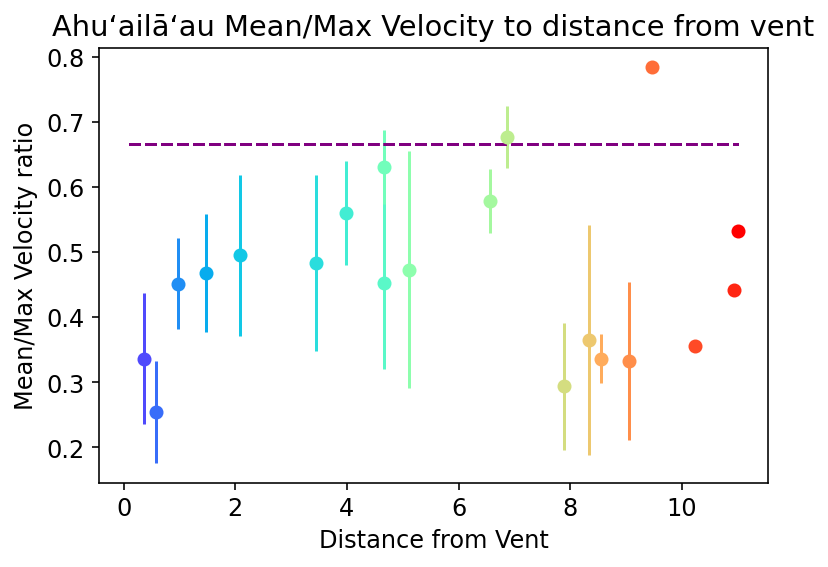

In [68]:
colors = cm.rainbow(np.linspace(0, 1, 22))


for i in range(Sites.Site.nunique()):
    #plt.errorbar(Sites.Site.unique()[i+2], Sites.groupby('Site')['Vel_Mean/Max'].mean()[i+2], yerr=np.array(Sites.groupby('Site')['Vel_Mean/Max'].std().fillna(0))[i+2], fmt="o" , color = colors[i] ) #, label = 'Site ' + str(np.unique(Julydf.Site.values)[i]))
    plt.errorbar(np.array(df.groupby('Site')['Vent_Distance'].mean()/1000)[i], ratio[i], ratio_std[i], fmt="o" , color = colors[i] , label = 'Avg ratio with stdv')
    plt.title('Ahuʻailāʻau Mean/Max Velocity to distance from vent')
    plt.xlabel('Distance from Vent')
    plt.ylabel('Mean/Max Velocity ratio')
    plt.hlines((2/3),xmin=.1, xmax=11, color='purple', linestyle='--', label= 'Newtonian viscous flow' ) 
#plt.legend()


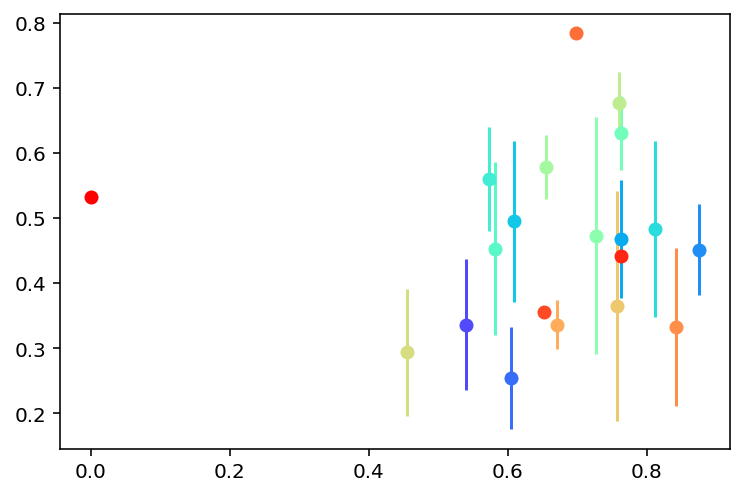

In [862]:
colors = cm.rainbow(np.linspace(0, 1, 22))


for i in range(Sites.Site.nunique()):
    #plt.errorbar(Sites.Site.unique()[i+2], Sites.groupby('Site')['Vel_Mean/Max'].mean()[i+2], yerr=np.array(Sites.groupby('Site')['Vel_Mean/Max'].std().fillna(0))[i+2], fmt="o" , color = colors[i] ) #, label = 'Site ' + str(np.unique(Julydf.Site.values)[i]))
    plt.errorbar(Mean_Max[i], ratio[i], ratio_std[i], fmt="o" , color = colors[i] , label = 'Avg ratio with stdv')
    plt.xaxis()


In [860]:
Max_Min=(df.groupby('Site')['Mean_Width'].mean()/ df.groupby('Site')['Max_Width'].mean().fillna(0))
Mean_Max = np.array(Max_Min.fillna(0))


In [866]:
Sites.groupby('Site')['Vel_Mean/Max'].mean()

Site
1.0          NaN
1.5          NaN
2.0     0.336240
3.0     0.254358
4.0     0.451661
5.0     0.468078
6.0     0.494883
7.0     0.483510
8.0     0.560166
9.1     0.452948
9.2     0.630874
10.0    0.473315
12.0    0.578614
13.0    0.676967
14.0    0.293668
15.0    0.365769
16.0    0.336547
17.0    0.332640
17.2    0.783573
18.0    0.355622
19.0    0.442386
21.0    0.532967
Name: Vel_Mean/Max, dtype: float64

From Dietterich et al.  "For a simple wide channel geometry, with a flow much wider than it is deep, analytical theory for Newtonian viscous flow finds that the mean velocity of the flow integrated over the depth is ~2/3 of the maximum surface velocity and the volumetric flux (Q) can be calculated as 𝑄=2/3𝑈max𝑑𝑤"


- We see here 

- see if ratio is closer to 2/3 for more rectangular flows

-  Meanwhile site 13 which exhibits a more rectangular geometry has an average mean/max velocity ratio of 0.677, suggesting this site (6.86 km from the vent) behaved in a Newtonian manner. majority of the sites, especially the proximal and distal sites had max/mean ratios well below what is expected for Newtonian fluids. This discrepency may result from the complex, often non-rectangular channel geomtries, and braided channels in the analysis. Additionally a few sites have stagnet very slow flowing region around the edges of the channel, with a steady flow in the center. These slow moving "stagnent zones" on the edges of some of the sites are often formed during an overflow event and is most apparent at Site 15 which has a narrow channel of __m that is steadily flowing ~ __ m/s whereas the rest is only flowing about __m/s.

Potenially, this deviation of the mean to max velocity ratio from Newtonian behvior is driven by the lava rheology itself. If this is the case, 


 A potentially more usuful measurment would be mean/max cross sectional area, which would not average the 
The other

In [872]:
df.groupby('Site').Visc_jeff.mean()

Site
1.0     130.754332
1.5      51.233174
2.0     146.189639
3.0     298.124211
4.0     426.933230
5.0     451.049026
6.0     624.683958
7.0     426.885585
8.0      67.852627
9.1            NaN
9.2            NaN
10.0           NaN
12.0           NaN
13.0           NaN
14.0           NaN
15.0           NaN
16.0           NaN
17.0           NaN
17.2           NaN
18.0           NaN
19.0           NaN
21.0           NaN
Name: Visc_jeff, dtype: float64

### Effusion Rate and how well it corralates with downstream flow

In [922]:
#if df.Date[2] == df.Date[201] + timedelta(hours=1)or df.Date[201] - timedelta(hours=1):
  
dfTime = df.set_index(df.Date)
#df.groupby(pd.Grouper(freq='60Min', base=30, label='right')).first()


df
dfTime.index[1] + timedelta(hours=1)

Timestamp('2018-08-04 20:25:00')

In [935]:

Timegrouped=[]
# for i in range(len(df.Date)):
    for j in range(len(df.Date))
        if df.Date[i]-df.Date[j] < 

Timedelta('-1 days +17:39:00')

In [1062]:
Timegrouped=[]
for i in range(len(df.Date)):
    for j in range(len(df.Date)):
        if (df.Date[i]-df.Date[j]) < timedelta(hours = 1) and (df.Date[i]-df.Date[j]) > timedelta(hours = -1) and i!=j:
            Timegrouped.append(df.iloc[[i, j], :]) 
len(Timegrouped)

482

In [1053]:
#for i in range(Sites.Site.nunique()):
    #plt.plot(X, (3/2)*X, c='grey')
   # dfSite = df[df.Site == np.unique(df.Site.values)[i]]
    #print(dfSite)
    
SiteEff = df[3:29]

range(len(SiteEff))

range(0, 26)

In [1093]:
# effusion rate grouped

Effgrouped=[]
for i in range(len(SiteEff)):
    for j in range(len(df.Date)):
        if (df.Date[i]-df.Date[j]) < timedelta(hours = 1) and (df.Date[i]-df.Date[j]) > timedelta(hours = -1) and i!=j :
            Effgrouped.append(df.iloc[[i, j], :]) 
len(Effgrouped)  

39

array([140, 372])

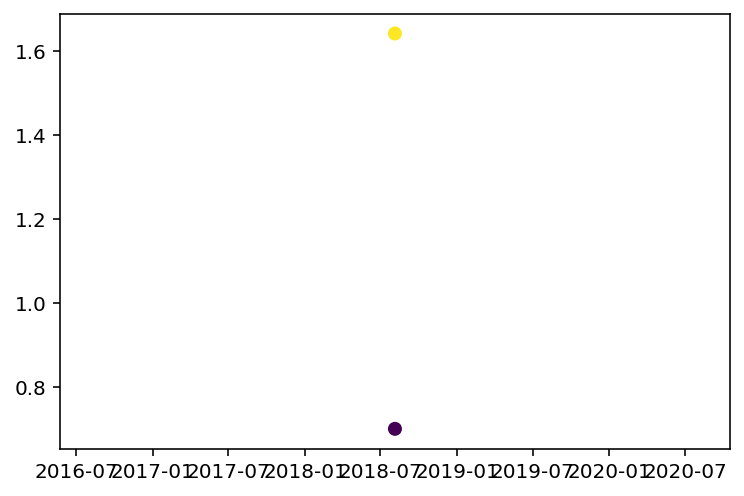

In [1077]:
plt.scatter(Effgrouped[2].Date,Effgrouped[2].PIV_Max, c = Effgrouped[2].Vent_Distance )
Effgrouped[2].Vent_Distance.values

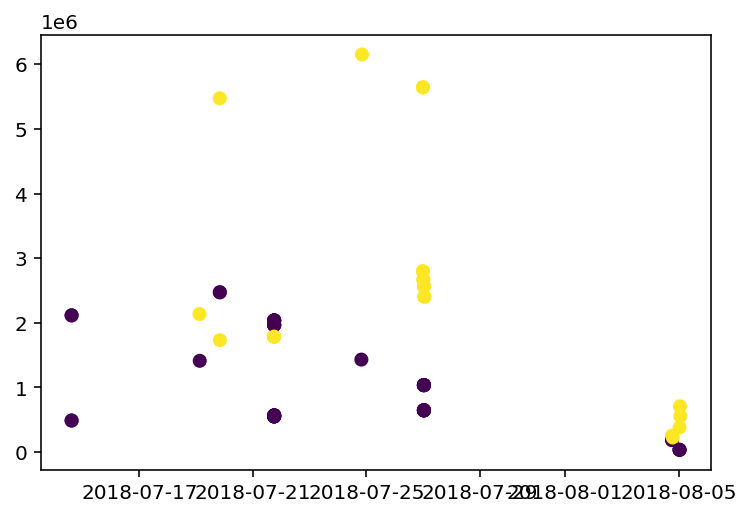

In [1094]:
#plot effusion rates to data

#colors = cm.rainbow(np.linspace(0, 1, 22))

for i in range(len(Effgrouped)):
    plt.scatter(Effgrouped[i].Date,Effgrouped[i].PIV_Max*Effgrouped[i].Depth_mean*Effgrouped[i].Mean_Width*Effgrouped[i].Density, c = Effgrouped[i].Site )#, colors=colors[Timegrouped[i].Site.values] )



In [1009]:
#plt.scatter(Timegrouped[100].Site, Timegrouped[100].PIV_Max)

#len(Timegrouped)

#Timegrouped
plt.scatter(Timegrouped[i].Date,Timegrouped[i].PIV_Max )

In [1024]:
Timegrouped[j].Site.nunique()
Timegrouped[2].Site.values
colors[2]

array([0.20803 , 0.718701, 0.472873, 1.      ])

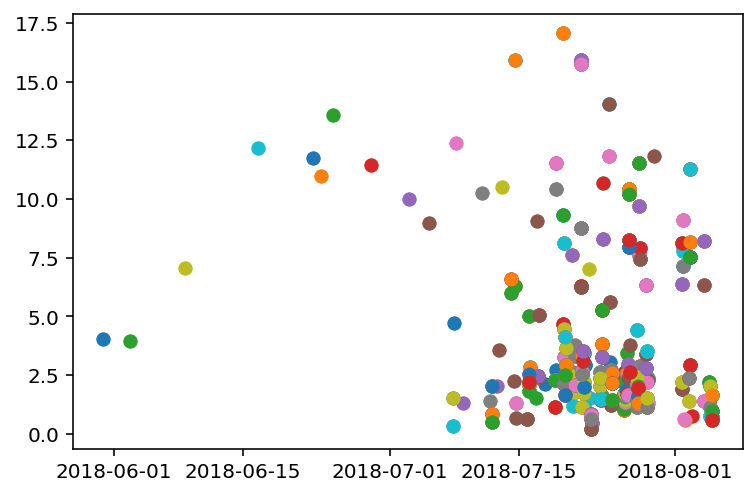

In [1028]:
colors = cm.rainbow(np.linspace(0, 1, 22))

for i in range(len(Timegrouped)):
    plt.scatter(Timegrouped[i].Date,Timegrouped[i].PIV_Max )#, colors=colors[Timegrouped[i].Site.values] )

In [955]:
df.Date[100]-df.Date[108]

Timedelta('-7 days +07:53:30')

## FLux and Mass Flow Rate Analysis

In [11]:
# determine errors

Vflux1 =[]
Vflux2=[]

uPIV_Max =[]
for i in range(len(df.PIV_Max)):
    uPIV_Max.append(ufloat(df.PIV_Max.values[i], df.Time_Stdv.values[i]))
    

uPIV_Mean =[]
for i in range(len(df.PIV_Max)):
    uPIV_Mean.append(ufloat(df.PIV_Mean.values[i], df.Time_Stdv.values[i]))

uDensity =[]
for i in range(len(df.Density)):
    uDensity.append(ufloat(df.Density.values[i], df.Density_Error.values[i]))
    
uDepth =[]
for i in range(len(df.Depth_mean)):
    uDepth.append(ufloat(df.Depth_mean.values[i], df.Depth_std.values[i]))

uWidth =[]
for i in range(len(df.Depth_mean)):
    uWidth.append(ufloat(df.Mean_Width.values[i], df.Width_Error_Lowerbound[i]))

uVes =[]
for i in range(len(df.Depth_mean)):
    uVes.append(ufloat(df.Vesicularity.values[i], df.Vesic_Error[i]))


Flux_error1 = []
for i in range(len(df.PIV_Mean[0:30])):
    Flux_error1.append((uDepth[i]* uWidth[i]*(2/3)*uPIV_Max[i]*(1-uVes[i])))

Flux_error2 = []
for i in range(30,211):
    Flux_error1.append((uDepth[i]* uWidth[i]*uPIV_Mean[i]*(1-uVes[i])))

Flow_rate_error1 = []
for i in range(len(df.PIV_Mean[0:30])):
    Flow_rate_error1.append((uDepth[i]* uWidth[i]*(2/3)*uPIV_Max[i]*uDensity[i]))

Flow_rate_error2 = []
for i in range(30,211):
    Flow_rate_error2.append((uDepth[i]* uWidth[i]*uPIV_Mean[i]*uDensity[i]))

VFlux1 = []
for i in range(len(df.PIV_Mean[0:30])):
    VFlux1.append((uDepth[i]* uWidth[i]*(2/3)*uPIV_Max[i]))

VFlux2 = []
for i in range(30,211):
    VFlux2.append((uDepth[i]* uWidth[i]*uPIV_Mean[i])) 
    
#concatenate
Flow_rate_error = np.concatenate((Flow_rate_error1, Flow_rate_error2))
Flux_error = np.concatenate((Flux_error1, Flux_error2))
VFlux_error = np.concatenate((VFlux1, VFlux2))

    
#type(vis_error[1])

#error values on viscosity
Flow_rate_errors = []
for i in range(len(df.PIV_Max)):
    Flow_rate_errors.append(Flow_rate_error[i].std_dev)
    
Flux_errors = []
for i in range(len(df.PIV_Max)):
    Flux_errors.append(Flux_error[i].std_dev)
    
VFlux_errors = []
for i in range(len(df.PIV_Max)):
    VFlux_errors.append(VFlux_error[i].std_dev)



#df.insert(1,'Flux_errorNew',Flux_errors)
#df.insert(1,'Flow_rate_errorNew',Flow_rate_errors)
#df.insert(1,'VFlux_error',VFlux_errors)

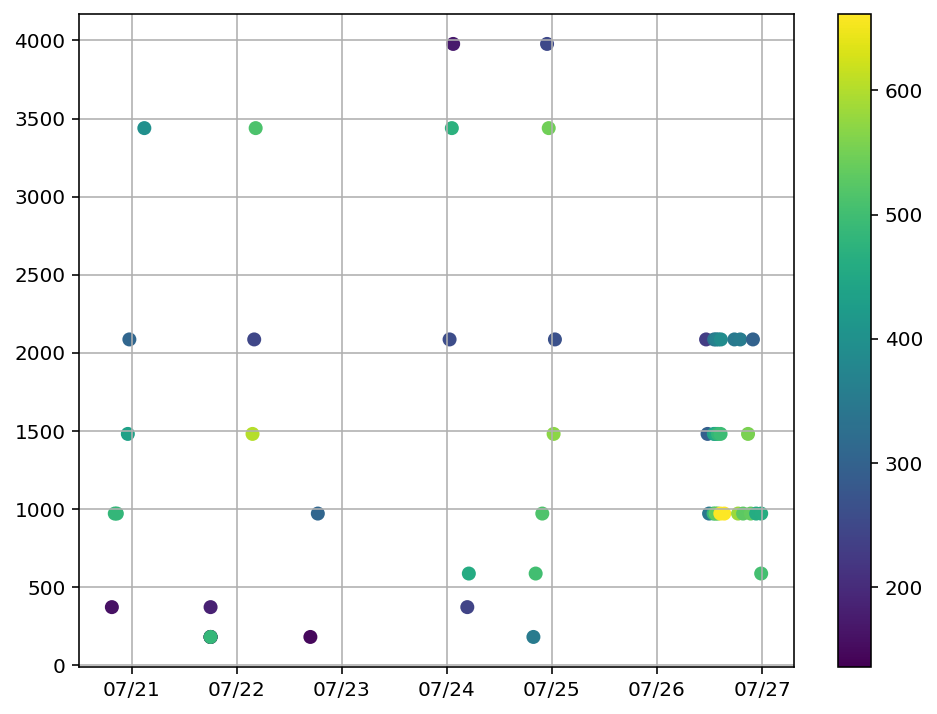

In [1193]:
fig, ax = plt.subplots(figsize=(8, 6))
Julydf2 = df.loc[df.Date> '7/20/18 00:00']
Julydf2 = Julydf2.loc[Julydf2.Date< '7/27/18 00:00']
#plt.scatter(Julydf.DRE_Flux, Julydf.Date, c=Julydf.Site)
plt.scatter(Julydf2.Date, Julydf2.Vent_Distance, c=Julydf2.DRE_Flux)
plt.colorbar()
plt.grid()
myFmt = mdates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(myFmt)
#plt.minorticks_on()


In [1160]:
(df.Mass_Flow_Rate/df.DRE_Flux)

0      2700.0
1      2700.0
2      2700.0
3      2700.0
4      2700.0
        ...  
206       NaN
207       NaN
208       NaN
209       NaN
210       NaN
Length: 211, dtype: float64

In [1161]:
Julydf.groupby(Julydf.Site).Mass_Flow_Rate.mean()/ Julydf.groupby(Julydf.Site).DRE_Flux.mean()

Site
1.0     2700.000000
1.5     2700.000000
2.0     2557.401674
3.0     1591.096135
4.0     2317.884476
5.0     2379.876575
6.0      532.515991
7.0     2939.472753
8.0     2147.731205
9.1             NaN
9.2             NaN
10.0            NaN
12.0            NaN
13.0            NaN
14.0            NaN
15.0            NaN
16.0            NaN
17.0            NaN
17.2            NaN
18.0            NaN
21.0            NaN
dtype: float64

$D = \frac{4 d W}{2 d +W } $


In [79]:
(df.Depth_std[32:]/df.Depth_mean[32:]).mean() *100

8.184479517260355

In [81]:
df.DRE_Flux

0      112.709802
1       45.292226
2        8.128992
3      179.026623
4      377.242643
          ...    
206           NaN
207           NaN
208           NaN
209           NaN
210           NaN
Name: DRE_Flux, Length: 211, dtype: float64

In [84]:
df['Volumetric_Flux'] = df.PIV_Mean * df.Mean_Width *df.Depth_mean

In [89]:
(df.DRE_Flux/df.Volumetric_Flux).mean()

0.2932566530846152

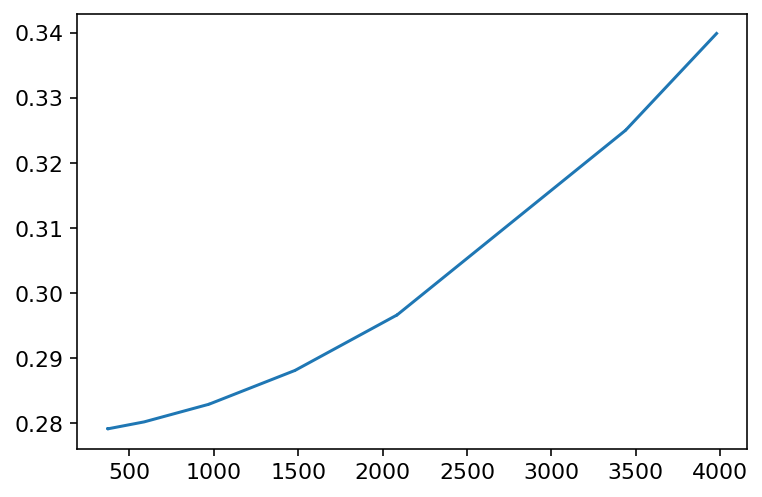

In [90]:
plt.plot(df.Vent_Distance,df.DRE_Flux/df.Volumetric_Flux)

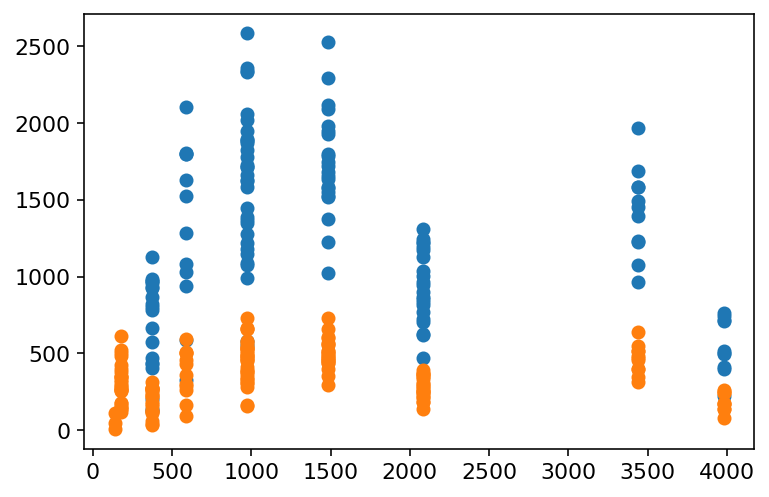

In [93]:
plt.scatter(df.Vent_Distance,df.Volumetric_Flux)
plt.scatter(df.Vent_Distance,df.DRE_Flux)

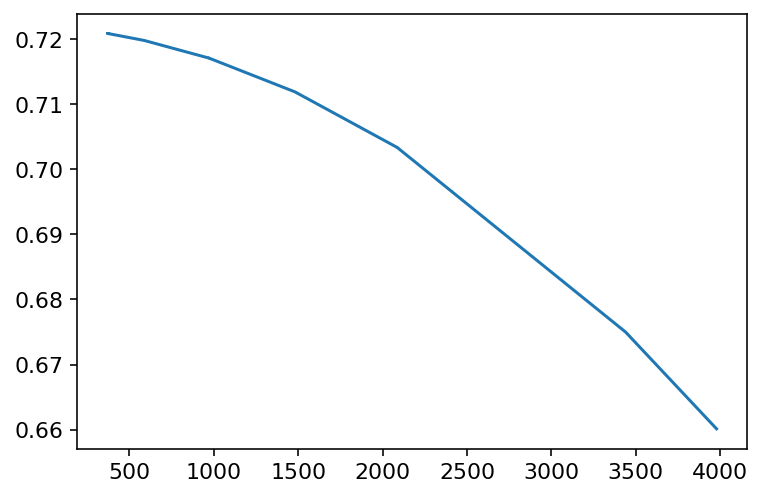

In [96]:
plt.plot(df.Vent_Distance,((df.Volumetric_Flux - df.DRE_Flux) / df.Volumetric_Flux))


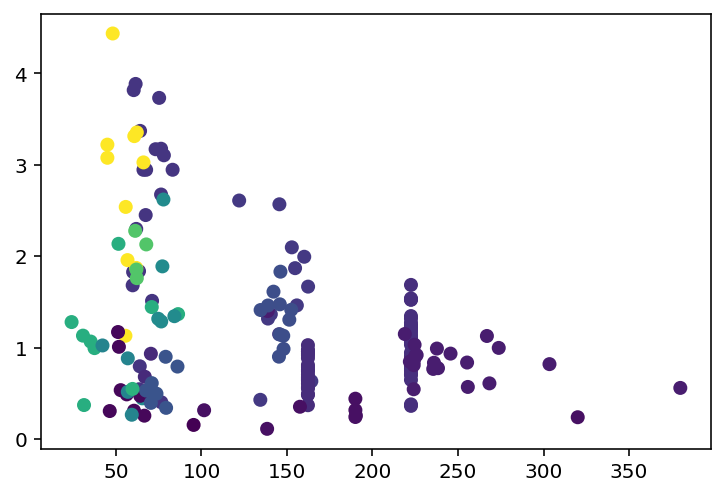

In [20]:
plt.scatter( df.Mean_Width,df.PIV_Mean, c=df.Slope_D)

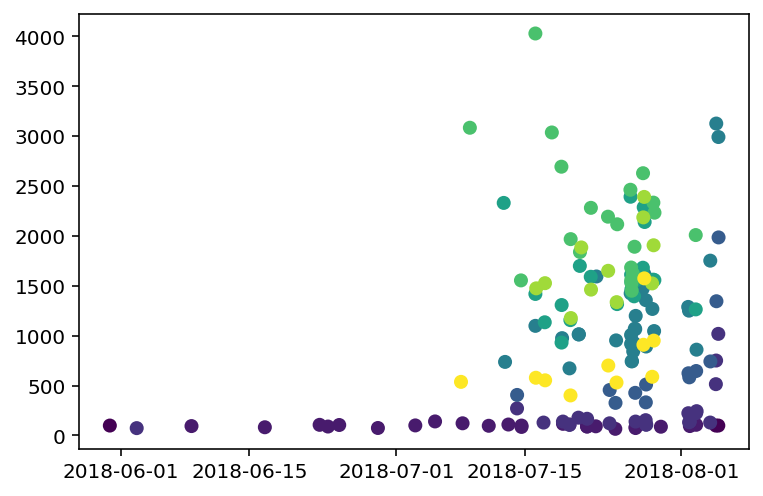

In [55]:
plt.scatter( df.Date,df.Visc_jeff, c= df.Site)

In [66]:
dfTI = df.groupby('Site')

In [70]:
df.iloc[]

## Viscosity increase over time

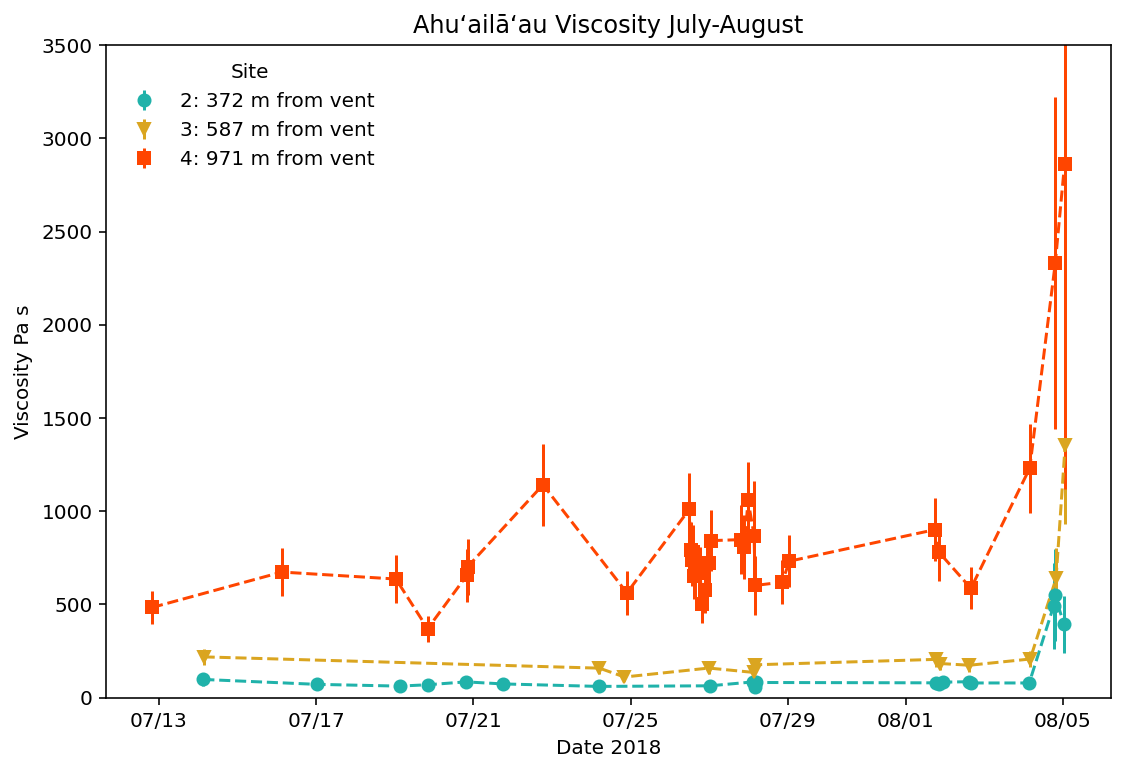

In [50]:
fig, ax = plt.subplots(figsize=(9, 6))

Julydf = df.loc[df.Date> '7/7/18 19:45']
colors = cm.rainbow(np.linspace(0, 1, 22))


plt.plot(Julydf[Julydf.Site==2].Date, Julydf[Julydf.Site==2].Visc_Ellip, color = 'lightseagreen', linestyle ='--')
plt.plot(df[df.Site==3].Date, df[df.Site==3].Visc_Ellip, color='goldenrod', linestyle ='--')
plt.plot(df[df.Site==4].Date, df[df.Site==4].Visc_Ellip, color='orangered',  linestyle ='--')


#plt.scatter(Julydf[Julydf.Site==2].Date, Julydf[Julydf.Site==2].Visc_Ellip, color=colors[2], label ='2: 372 m from vent')
#plt.scatter(df[df.Site==3].Date, df[df.Site==3].Visc_Ellip, color=colors[3], label ='3: 587 m from vent')
#plt.scatter(df[df.Site==4].Date, df[df.Site==4].Visc_Ellip, color=colors[4], label ='4: 971 m from vent')

plt.errorbar(np.array(Julydf[Julydf.Site==2].Date), np.array(Julydf[Julydf.Site==2].Visc_Ellip), np.array(Julydf[Julydf.Site==2].Visc_Ellip_Error), fmt ='o',  color = 'lightseagreen', label ='2: 372 m from vent' ) #, label ='2: 372 m from vent')
plt.errorbar(np.array(df[df.Site==3].Date), np.array(df[df.Site==3].Visc_Ellip), np.array(df[df.Site==3].Visc_Ellip_Error),  fmt ='o',  marker ="v", color='goldenrod', label ='3: 587 m from vent')
plt.errorbar(np.array(df[df.Site==4].Date), np.array(df[df.Site==4].Visc_Ellip), np.array(df[df.Site==4].Visc_Ellip_Error), fmt ='o',  marker ="s", color='orangered', label ='4: 971 m from vent')

plt.ylim(0, 3500)
#plt.errorbar(Julydf[Julydf.Site==2].Date, flux2, np.array(Julydf[Julydf.Site==2].VFlux_error),fmt ='o', label ='2: 372 m from vent', color = 'lightseagreen' )
#plt.errorbar(df[df.Site==3].Date, flux3, np.array(Julydf[Julydf.Site==3].VFlux_error), fmt ='o', marker ="v", label ='3: 587 m from vent', color='goldenrod' ,)
#plt.errorbar(df[df.Site==4].Date, flux4, np.array(Julydf[Julydf.Site==4].VFlux_error), fmt ='o',marker= "s", label ='4: 971 m from vent', color='orangered',)




#plt.plot(Julydf[Julydf.Site==1].Date, Julydf[Julydf.Site==1].Visc_Ellip, linestyle ='--', color=colors[1])
#plt.scatter(Julydf[Julydf.Site==1].Date, Julydf[Julydf.Site==1].Visc_Ellip, color=colors[1], label ='1')


#vline = dt.datetime(2018, 8, 5, 10)
#plt.axvline(dt.datetime(2018, 8, 5, 3), ls='-', color = 'indianred' )

#plt.text(vline, 1000, 'End of Major Effusion', rotation=-90, color = 'indianred')#trans)




plt.legend(bbox_to_anchor=(0,1), frameon=False, loc="upper left", title="Site", fontsize='10')

plt.title('Ahuʻailāʻau Viscosity July-August')
plt.xlabel('Date 2018')
plt.ylabel('Viscosity Pa s')
#plt.setp(ax.get_xticklabels(), rotation=45)
#plt.legend(bbox_to_anchor=(.7,1), loc="upper left")
myFmt = mdates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(myFmt)


In [51]:
flux = df.PIV_Mean *df.Depth_mean*df.Mean_Width 
#print(flux.values)
df['Volumetric_Flux'] = flux 

df.to_excel('yer.xlsx')

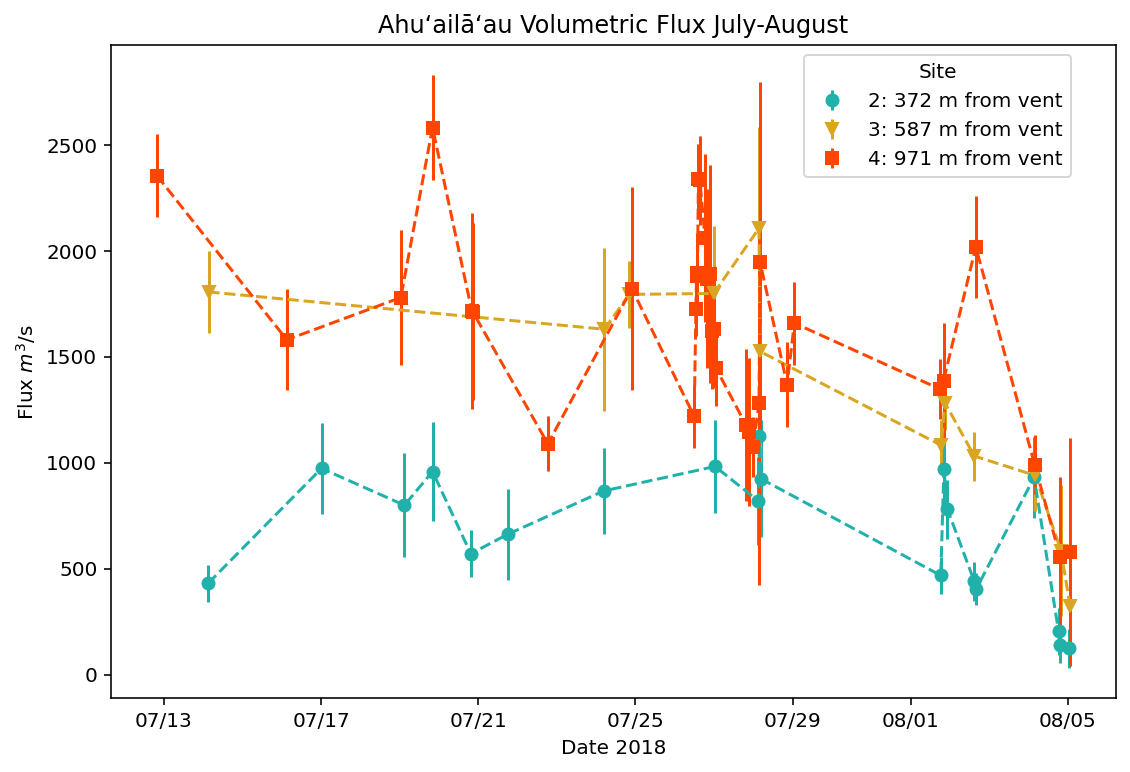

In [58]:
fig, ax = plt.subplots(figsize=(9, 6))

Julydf = df.loc[df.Date> '7/7/18 19:45']
colors = cm.rainbow(np.linspace(0, 1, 22))


flux2 = Julydf[Julydf.Site==2].PIV_Mean * Julydf[Julydf.Site==2].Depth_mean * Julydf[Julydf.Site==2].Mean_Width #* (1-Julydf[Julydf.Site==2].Vesicularity) # Julydf[Julydf.Site==2].Density 
flux3 = Julydf[Julydf.Site==3].PIV_Mean * Julydf[Julydf.Site==3].Depth_mean * Julydf[Julydf.Site==3].Mean_Width # * (1-Julydf[Julydf.Site==3].Vesicularity) # Julydf[Julydf.Site==3].Density 
flux4 = Julydf[Julydf.Site==4].PIV_Mean * Julydf[Julydf.Site==4].Depth_mean * Julydf[Julydf.Site==4].Mean_Width #  * (1-Julydf[Julydf.Site==4].Vesicularity) # Julydf[Julydf.Site==4].Density


plt.plot(Julydf[Julydf.Site==2].Date, flux2, color='lightseagreen', linestyle ='--')
plt.plot(df[df.Site==3].Date, flux3, color='goldenrod' , linestyle ='--')
plt.plot(df[df.Site==4].Date, flux4, color='orangered',  linestyle ='--')

#plt.scatter(Julydf[Julydf.Site==2].Date, flux2, color=colors[2], label ='2: 372 m from vent')
#plt.scatter(df[df.Site==3].Date, flux3, color=colors[3], label ='3: 587 m from vent')
#plt.scatter(df[df.Site==4].Date, flux4, color=colors[4], label ='4: 971 m from vent')

plt.errorbar(Julydf[Julydf.Site==2].Date, flux2, np.array(Julydf[Julydf.Site==2].Volumetric_Flux_Error),fmt ='o', label ='2: 372 m from vent', color = 'lightseagreen' )
plt.errorbar(df[df.Site==3].Date, flux3, np.array(Julydf[Julydf.Site==3].Volumetric_Flux_Error), fmt ='o', marker ="v", label ='3: 587 m from vent', color='goldenrod' ,)
plt.errorbar(df[df.Site==4].Date, flux4, np.array(Julydf[Julydf.Site==4].Volumetric_Flux_Error), fmt ='o',marker= "s", label ='4: 971 m from vent', color='orangered',)




#plt.plot(Julydf[Julydf.Site==1].Date, Julydf[Julydf.Site==1].Visc_Ellip, linestyle ='--', color=colors[1])
#plt.scatter(Julydf[Julydf.Site==1].Date, Julydf[Julydf.Site==1].Visc_Ellip, color=colors[1], label ='1')


#vline = dt.datetime(2018, 8, 5, 10)
#plt.axvline(dt.datetime(2018, 8, 5, 3), ls='-', color = 'indianred' )

#plt.text(vline, 1000, 'End of Major Effusion', rotation=-90, color = 'indianred')#trans)




plt.legend(bbox_to_anchor=(.68,1), frameon=True, loc="upper left", title="Site", fontsize='10')

plt.title('Ahuʻailāʻau Volumetric Flux July-August')
plt.xlabel('Date 2018')
plt.ylabel('Flux $m^3$/s')
#plt.setp(ax.get_xticklabels(), rotation=45)
#plt.legend(bbox_to_anchor=(.7,1), loc="upper left")
myFmt = mdates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(myFmt)
#plt.yscale('log')




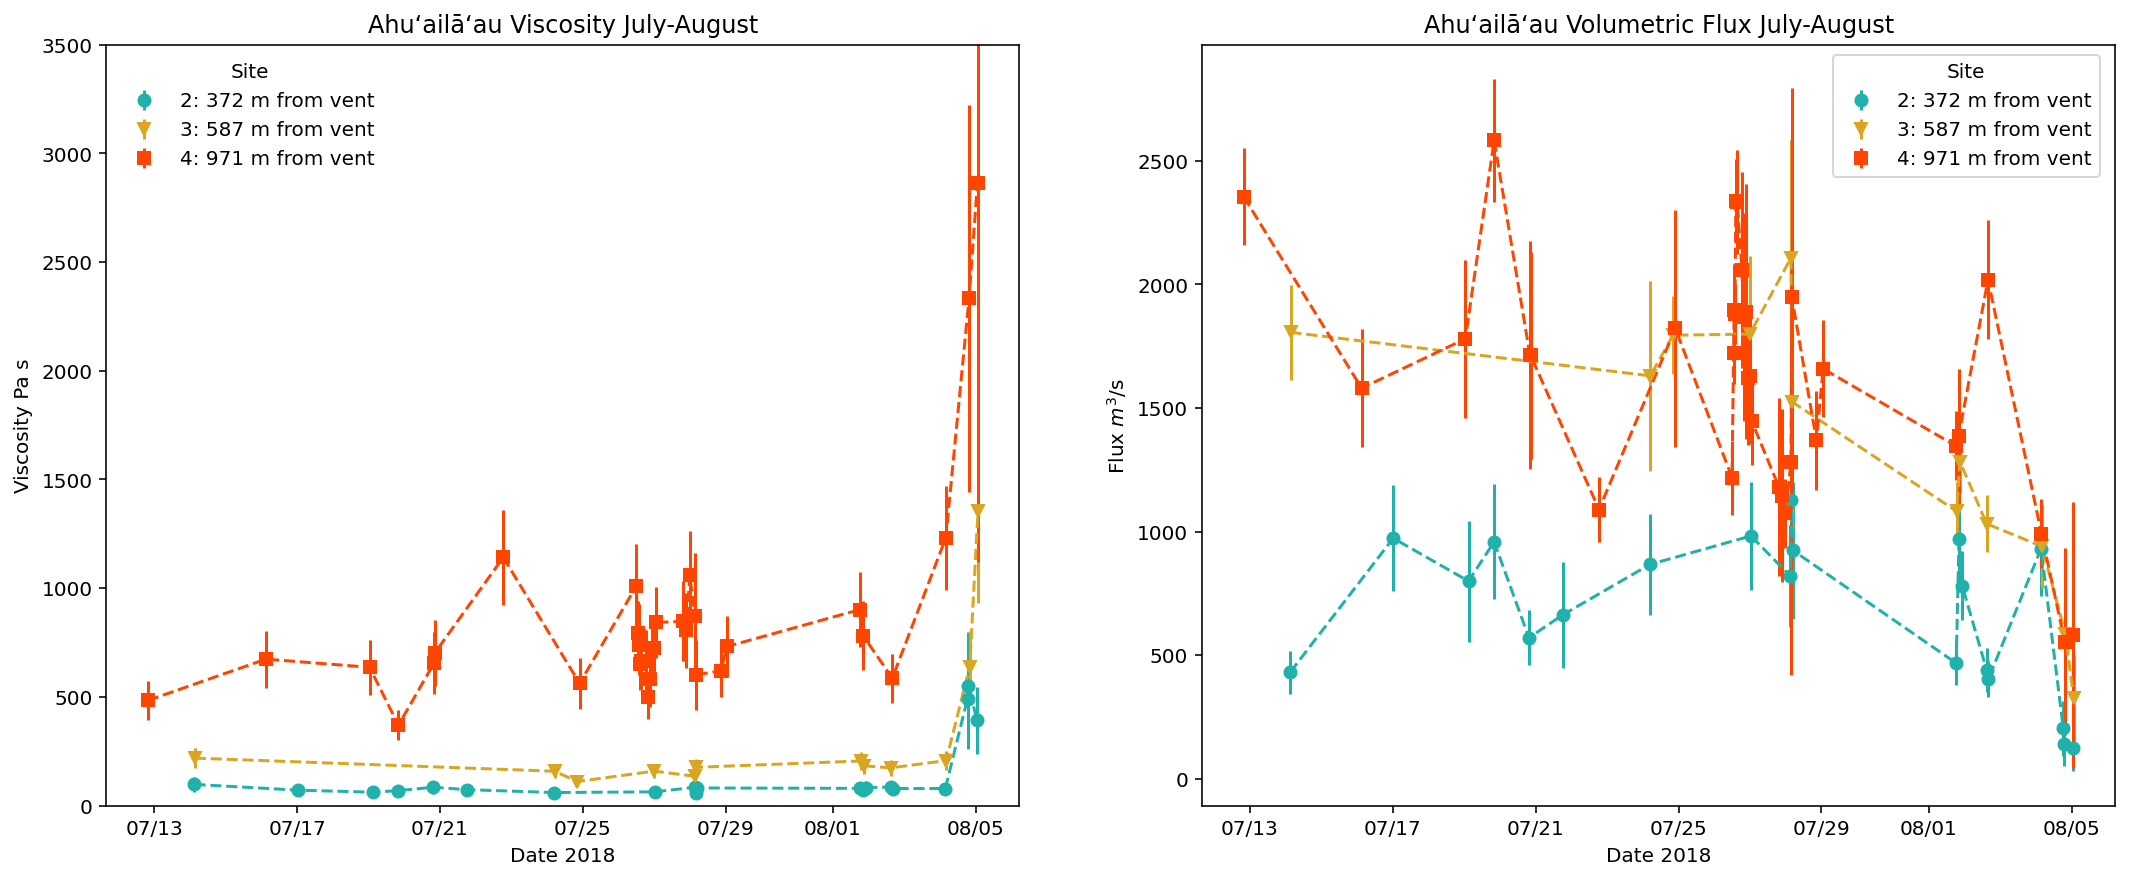

In [63]:
fig, ax = plt.subplots(1,2,figsize=(18, 7))

ax[0].plot(Julydf[Julydf.Site==2].Date, Julydf[Julydf.Site==2].Visc_Ellip, color = 'lightseagreen', linestyle ='--')
ax[0].plot(df[df.Site==3].Date, df[df.Site==3].Visc_Ellip, color='goldenrod', linestyle ='--')
ax[0].plot(df[df.Site==4].Date, df[df.Site==4].Visc_Ellip, color='orangered',  linestyle ='--')

ax[0].errorbar(np.array(Julydf[Julydf.Site==2].Date), np.array(Julydf[Julydf.Site==2].Visc_Ellip), np.array(Julydf[Julydf.Site==2].Visc_Ellip_Error), fmt ='o',  color = 'lightseagreen', label ='2: 372 m from vent' ) #, label ='2: 372 m from vent')
ax[0].errorbar(np.array(df[df.Site==3].Date), np.array(df[df.Site==3].Visc_Ellip), np.array(df[df.Site==3].Visc_Ellip_Error),  fmt ='o',  marker ="v", color='goldenrod', label ='3: 587 m from vent')
ax[0].errorbar(np.array(df[df.Site==4].Date), np.array(df[df.Site==4].Visc_Ellip), np.array(df[df.Site==4].Visc_Ellip_Error), fmt ='o',  marker ="s", color='orangered', label ='4: 971 m from vent')

ax[0].set_ylim(0, 3500)

ax[0].legend(bbox_to_anchor=(0,1), frameon=False, loc="upper left", title="Site", fontsize='10')

ax[0].set_title('Ahuʻailāʻau Viscosity July-August')
ax[0].set_xlabel('Date 2018')
ax[0].set_ylabel('Viscosity Pa s')
#plt.setp(ax.get_xticklabels(), rotation=45)
#plt.legend(bbox_to_anchor=(.7,1), loc="upper left")
myFmt = mdates.DateFormatter('%m/%d')
ax[0].xaxis.set_major_formatter(myFmt)


flux2 = Julydf[Julydf.Site==2].PIV_Mean * Julydf[Julydf.Site==2].Depth_mean * Julydf[Julydf.Site==2].Mean_Width #* (1-Julydf[Julydf.Site==2].Vesicularity) # Julydf[Julydf.Site==2].Density 
flux3 = Julydf[Julydf.Site==3].PIV_Mean * Julydf[Julydf.Site==3].Depth_mean * Julydf[Julydf.Site==3].Mean_Width # * (1-Julydf[Julydf.Site==3].Vesicularity) # Julydf[Julydf.Site==3].Density 
flux4 = Julydf[Julydf.Site==4].PIV_Mean * Julydf[Julydf.Site==4].Depth_mean * Julydf[Julydf.Site==4].Mean_Width #  * (1-Julydf[Julydf.Site==4].Vesicularity) # Julydf[Julydf.Site==4].Density


ax[1].plot(Julydf[Julydf.Site==2].Date, flux2, color='lightseagreen', linestyle ='--')
ax[1].plot(df[df.Site==3].Date, flux3, color='goldenrod' , linestyle ='--')
ax[1].plot(df[df.Site==4].Date, flux4, color='orangered',  linestyle ='--')

#plt.scatter(Julydf[Julydf.Site==2].Date, flux2, color=colors[2], label ='2: 372 m from vent')
#plt.scatter(df[df.Site==3].Date, flux3, color=colors[3], label ='3: 587 m from vent')
#plt.scatter(df[df.Site==4].Date, flux4, color=colors[4], label ='4: 971 m from vent')

ax[1].errorbar(Julydf[Julydf.Site==2].Date, flux2, np.array(Julydf[Julydf.Site==2].Volumetric_Flux_Error),fmt ='o', label ='2: 372 m from vent', color = 'lightseagreen' )
ax[1].errorbar(df[df.Site==3].Date, flux3, np.array(Julydf[Julydf.Site==3].Volumetric_Flux_Error), fmt ='o', marker ="v", label ='3: 587 m from vent', color='goldenrod' ,)
ax[1].errorbar(df[df.Site==4].Date, flux4, np.array(Julydf[Julydf.Site==4].Volumetric_Flux_Error), fmt ='o',marker= "s", label ='4: 971 m from vent', color='orangered',)




#plt.plot(Julydf[Julydf.Site==1].Date, Julydf[Julydf.Site==1].Visc_Ellip, linestyle ='--', color=colors[1])
#plt.scatter(Julydf[Julydf.Site==1].Date, Julydf[Julydf.Site==1].Visc_Ellip, color=colors[1], label ='1')


#vline = dt.datetime(2018, 8, 5, 10)
#plt.axvline(dt.datetime(2018, 8, 5, 3), ls='-', color = 'indianred' )

#plt.text(vline, 1000, 'End of Major Effusion', rotation=-90, color = 'indianred')#trans)




ax[1].legend(bbox_to_anchor=(.68,1), frameon=True, loc="upper left", title="Site", fontsize='10')

ax[1].set_title('Ahuʻailāʻau Volumetric Flux July-August')
ax[1].set_xlabel('Date 2018')
ax[1].set_ylabel('Flux $m^3$/s')
#plt.setp(ax.get_xticklabels(), rotation=45)
#plt.legend(bbox_to_anchor=(.7,1), loc="upper left")
myFmt = mdates.DateFormatter('%m/%d')
ax[1].xaxis.set_major_formatter(myFmt)



In [186]:
#df[df.Site==3].Visc_Ellip
print('Viscosity at Site 2 increased ', round((392.72810/78.55186)*100) , ' % from August 2nd - 5th')
print('Viscosity at Site 3 increased ', round((1353.6160/173.5615)*100) , ' % from August 2nd - 5th')
print('Viscosity at Site 4 increased ', round((2865.3640/ 586.2735)*100) , ' % from August 2nd - 5th')


Viscosity at Site 2 increased  500  % from August 2nd - 5th
Viscosity at Site 3 increased  780  % from August 2nd - 5th
Viscosity at Site 4 increased  489  % from August 2nd - 5th


In [ ]:
Sites selected based on coverage of end of effusion

In [228]:
df.groupby('Site').mean().Visc_Ellip

Site
1.0      134.834433
1.5       95.615204
2.0      133.162180
3.0      309.825167
4.0      852.684627
5.0     1115.625855
6.0     1541.284905
7.0     1219.971591
8.0      646.796930
9.1             NaN
9.2             NaN
10.0            NaN
12.0            NaN
13.0            NaN
14.0            NaN
15.0            NaN
16.0            NaN
17.0            NaN
17.2            NaN
18.0            NaN
19.0            NaN
21.0            NaN
Name: Visc_Ellip, dtype: float64

In [212]:
df.groupby('Site').mean().Vent_Distance

Site
1.0       140
1.5       181
2.0       372
3.0       587
4.0       971
5.0      1481
6.0      2086
7.0      3439
8.0      3978
9.1      4665
9.2      4668
10.0     5115
12.0     6563
13.0     6863
14.0     7881
15.0     8334
16.0     8556
17.0     9044
17.2     9455
18.0    10227
19.0    10926
21.0    11000
Name: Vent_Distance, dtype: int64